# **P2 Mile Stone 1** 💎

## 1. INTRODUCTION 👋

*   Nama: Karel Gideon Anugrah Hutajulu
*   Batch: FTDS HCK-004


**Problem Statement:**

Sebuah perusahaan ingin meminimalisir resiko seorang customer untuk berhenti memakai produk yang mereka tawarkan. Bantulah perusahaan tersebut untuk memprediksi customer yang akan berhenti (churn) dari dataset yang diberikan.



## 2. IMPORT LIBRARIES 💽

In [1]:
#!pip install --upgrade tensorflow

In [ ]:
#!pip install keras-tuner

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import skew

#untuk model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model, load_model

# from tensorflow.python.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Input, Dense, Dropout

from kerastuner.tuners import RandomSearch

from tensorflow.keras import layers

from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

from tensorflow.keras.optimizers import Adam


#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

#VIF
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#evaluasi
from sklearn.metrics import confusion_matrix ,accuracy_score, roc_curve,roc_auc_score,precision_score, recall_score, classification_report, f1_score

#Attach images to the google notebook
from IPython.display import Image


import pickle

## 3. DATA LOADING 💽

In [3]:
df = pd.read_csv('/content/churn.csv')

In [4]:
#Display top 10 rows of dataframe df
df.head(10)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,1184.490000,38604.69,10.0,627.48000,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,338.150000,7665.66,17.0,575.97000,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,235.140000,37671.69,5.0,767.93000,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,56.670000,15678.14,11.0,590.22000,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,153.990000,8422.68,0.0,722.04000,Yes,No,No,Not Applicable,Poor Product Quality,0
5,96fbb6f63244b1f4,35,M,Town,Premium Membership,2016-08-16,No,Credit/Debit Card Offers,NaN,Wi-Fi,...,1397.318999,29664.01,28.0,782.49000,No,Yes,Yes,Unsolved,Poor Product Quality,0
6,a52bc51378ecb057,43,M,NaN,Gold Membership,2017-03-09,Yes,Gift Vouchers/Coupons,Smartphone,Mobile_Data,...,416.300000,13160.39,24.0,712.94000,Yes,No,No,Not Applicable,No reason specified,1
7,94f338d20bf0f2b2,15,M,City,No Membership,2016-09-11,No,Credit/Debit Card Offers,Smartphone,Wi-Fi,...,34.070000,9151.14,29.0,655.43000,Yes,No,No,Not Applicable,No reason specified,1
8,85c7996b17862e57,49,M,Town,Platinum Membership,2017-04-24,Yes,Without Offers,NaN,Fiber_Optic,...,650.120000,81628.48,11.0,0.00000,Yes,Yes,No,Not Applicable,Products always in Stock,0
9,8a1625846d7a198b,35,F,Town,Basic Membership,2016-12-01,Yes,Credit/Debit Card Offers,Desktop,Mobile_Data,...,106.230000,28232.59,16.0,984.93392,No,Yes,No,Not Applicable,Too many ads,1


In [5]:
#Display bottom 10 rows of dataframe df
df.tail(10)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
37000,8a0fff47b7846031,25,F,Town,No Membership,2017-01-20,No,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,119.830000,13147.91,0.0,1019.382051,Yes,No,Yes,Solved in Follow-up,Poor Product Quality,1
37001,8832eec42dc0e347,38,M,Town,Silver Membership,2016-09-19,NaN,Credit/Debit Card Offers,Smartphone,Wi-Fi,...,34.790000,30820.83,23.0,631.830000,Yes,No,Yes,Unsolved,Poor Customer Service,1
37002,b9d9761f4d367c7a,49,F,City,No Membership,2017-12-12,NaN,Without Offers,Both,Wi-Fi,...,499.510000,17110.71,24.0,587.010000,Yes,No,No,Not Applicable,Poor Customer Service,1
37003,a38816e7522f5f7b,42,F,Town,Basic Membership,2017-07-05,Yes,Gift Vouchers/Coupons,Both,Wi-Fi,...,529.580000,42964.11,18.0,619.280000,Yes,Yes,No,Not Applicable,Poor Product Quality,1
37004,8968d0458164dda9,19,F,Town,Gold Membership,2016-07-17,Yes,Without Offers,Smartphone,Fiber_Optic,...,119.960000,14218.43,7.0,781.840000,Yes,No,No,Not Applicable,Too many ads,0
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,199.330000,29455.29,9.0,846.520000,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,...,368.500000,27038.47,8.0,835.980000,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,...,272.130000,39305.35,27.0,714.900000,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,...,65.070000,46108.73,6.0,744.990000,No,Yes,No,Not Applicable,Poor Website,0
37009,93b5d0330d24fa15,36,M,Town,Gold Membership,2016-10-18,NaN,Without Offers,Both,Fiber_Optic,...,972.776679,26905.49,22.0,700.930000,Yes,No,Yes,No Information Available,Poor Customer Service,1


### Simple Data Understanding before we explore 🔍

In [6]:
df.dtypes

user_id                          object
age                               int64
gender                           object
region_category                  object
membership_category              object
joining_date                     object
joined_through_referral          object
preferred_offer_types            object
medium_of_operation              object
internet_option                  object
last_visit_time                  object
days_since_last_login             int64
avg_time_spent                  float64
avg_transaction_value           float64
avg_frequency_login_days        float64
points_in_wallet                float64
used_special_discount            object
offer_application_preference     object
past_complaint                   object
complaint_status                 object
feedback                         object
churn_risk_score                  int64
dtype: object

and view how many rows of data do we have to work with.

In [7]:
df.shape

(37010, 22)

### Converting date and time to a numerical representation ⏲

Dates can be inputs for an artificial neural network (ANN). However, I need to convert the date values into a numerical representation that the ANN can understand and process.

One common way to do this is to convert the `date into a numerical value` that represents the number of days since a fixed reference point, such as `January 1, 2000` (also known as `Unix time`).

In [8]:
# Convert the date column to the number of days elapsed since a reference date
reference_date = pd.Timestamp('2000-01-01')
df['joining_date'] = pd.to_datetime(df['joining_date']).dt.date
df['joining_date'] = (df['joining_date'] - reference_date.date()).dt.days

convert the time into the number of seconds elapsed since midnight (i.e., the number of seconds since the start of the day).

In [9]:
df['last_visit_time'] = pd.to_datetime(df['last_visit_time'], format='%H:%M:%S').dt.time
df['last_visit_time'] = df['last_visit_time'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)

In [10]:
df.head(1)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,6304,Yes,Without Offers,NaN,Wi-Fi,...,1184.49,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1


In [11]:
df.dtypes

user_id                          object
age                               int64
gender                           object
region_category                  object
membership_category              object
joining_date                      int64
joined_through_referral          object
preferred_offer_types            object
medium_of_operation              object
internet_option                  object
last_visit_time                   int64
days_since_last_login             int64
avg_time_spent                  float64
avg_transaction_value           float64
avg_frequency_login_days        float64
points_in_wallet                float64
used_special_discount            object
offer_application_preference     object
past_complaint                   object
complaint_status                 object
feedback                         object
churn_risk_score                  int64
dtype: object

*Reference Article:*

https://www.quora.com/How-should-I-use-date-as-an-input-for-a-neural-network-Is-there-any-format-that-I-should-use-for-the-date

## 4. EXPLORATORY DATA ANALYSIS (EDA) 🎁

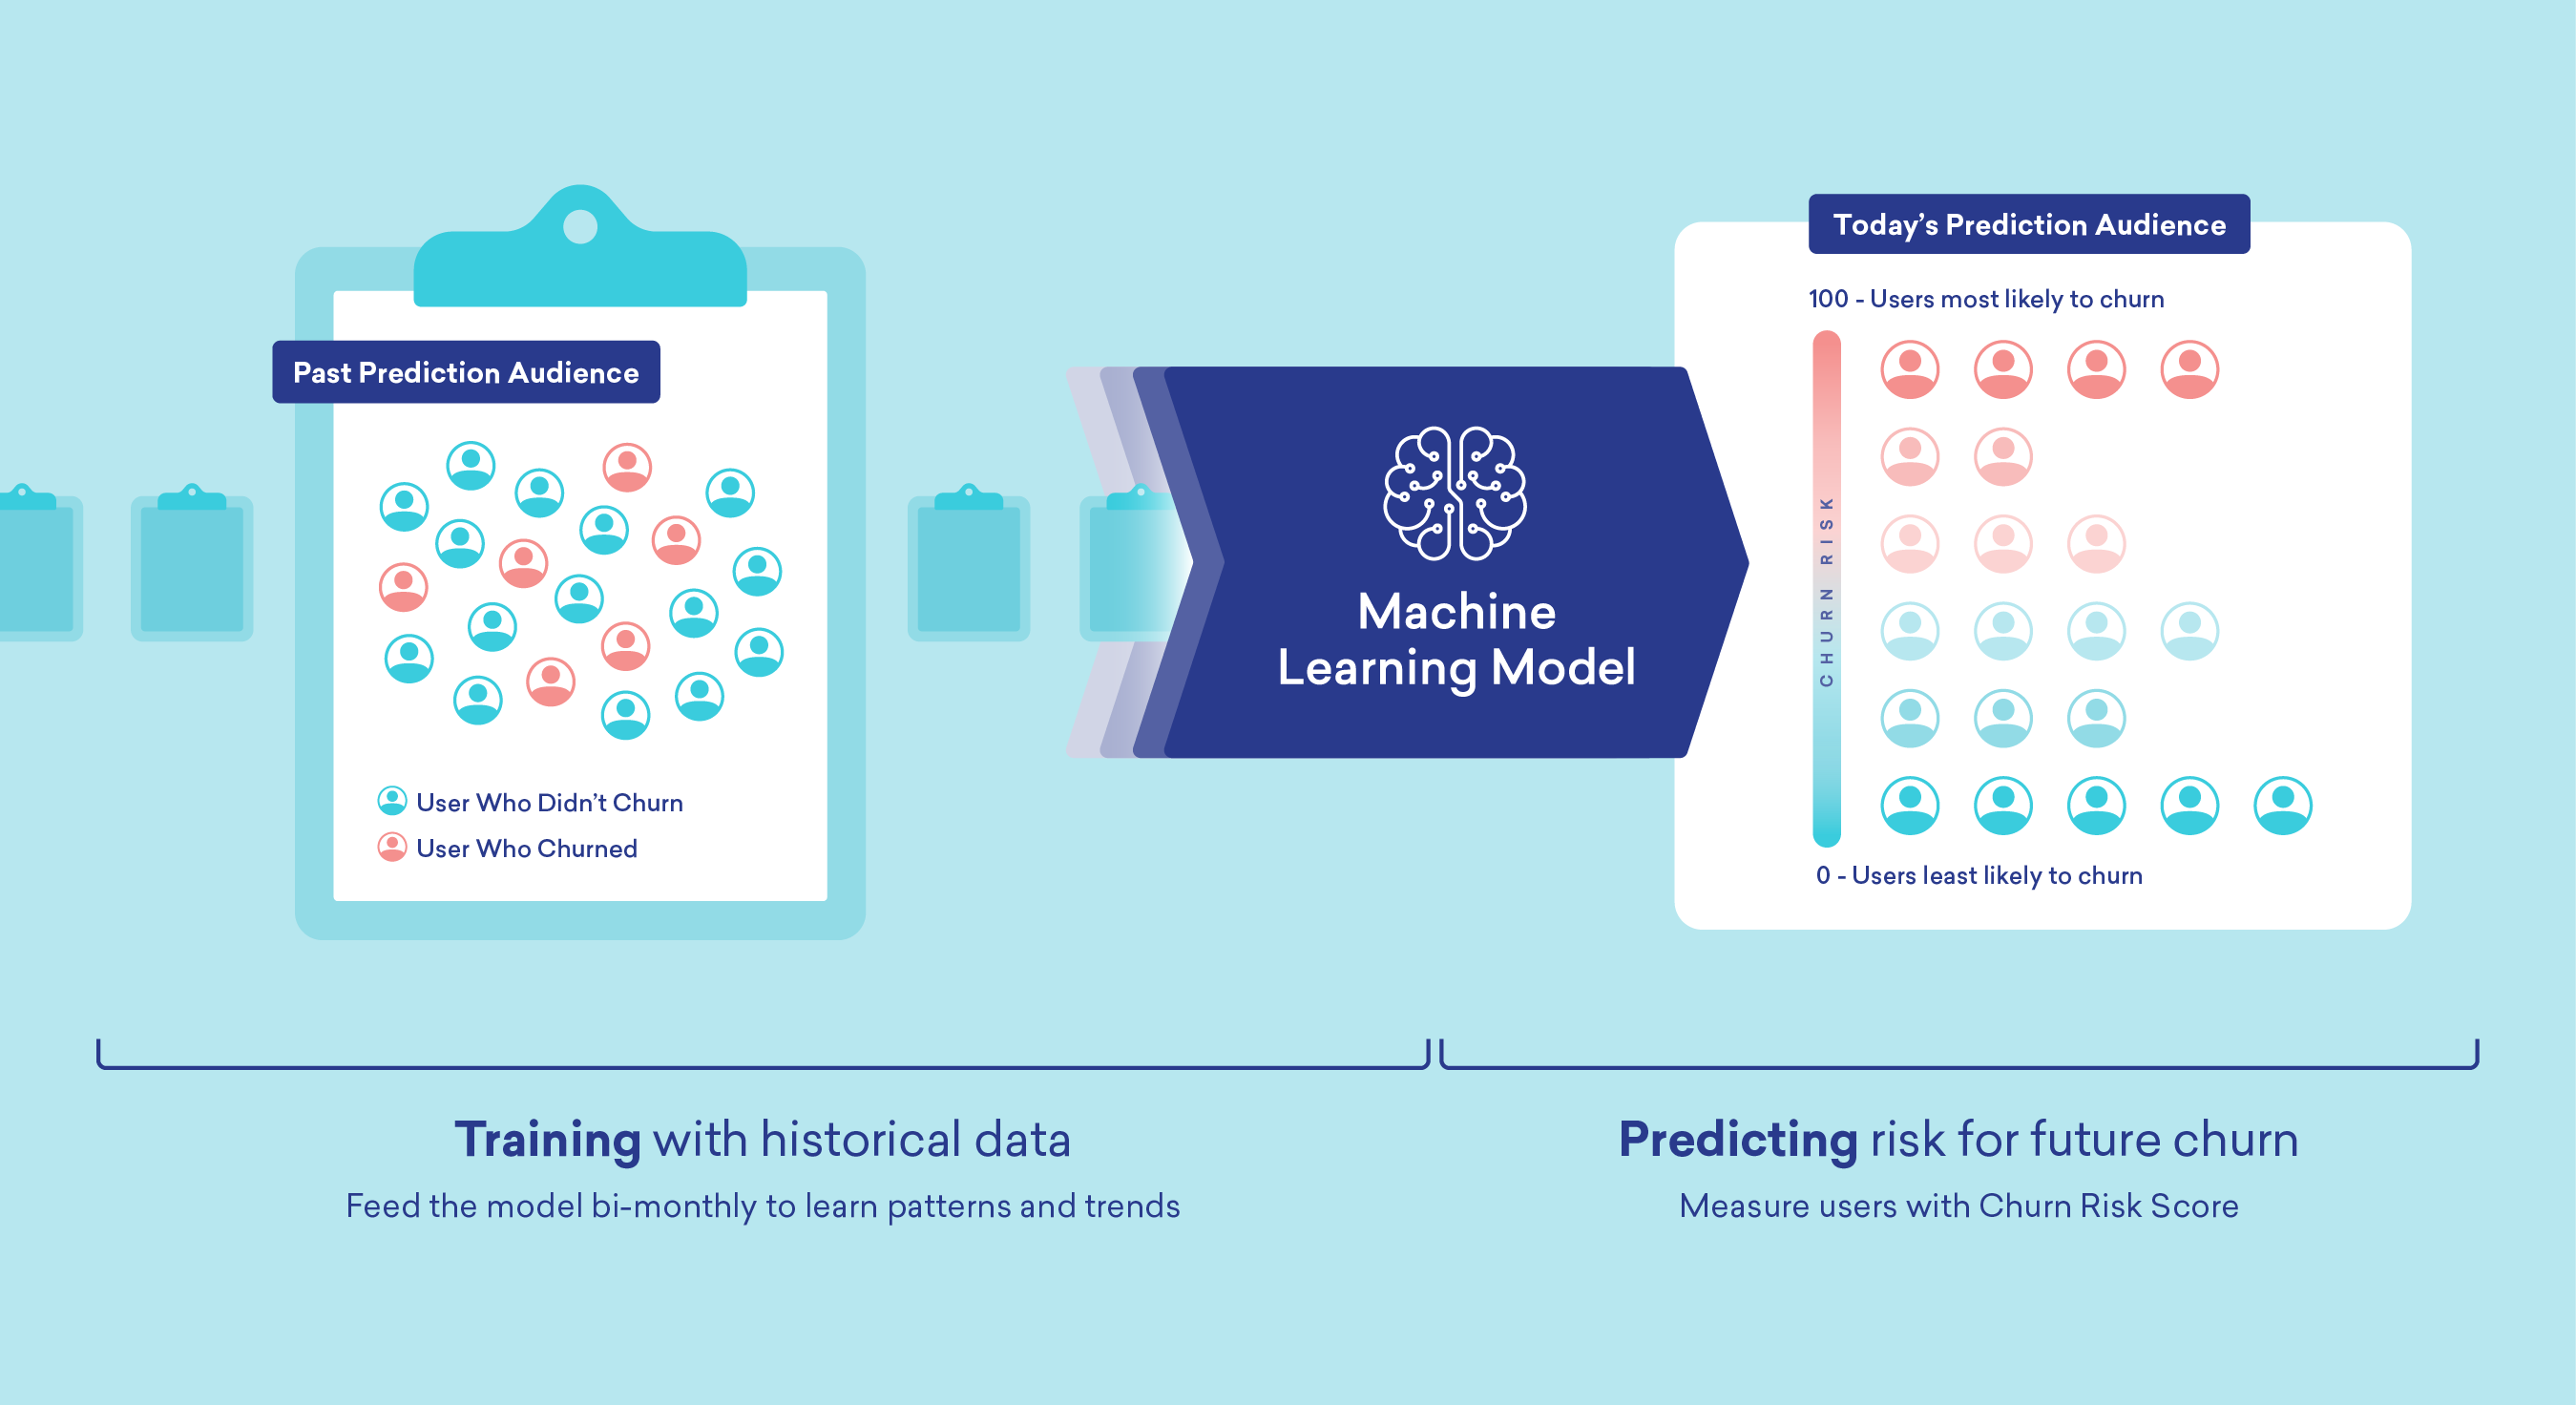

In [12]:
Image('/content/churn_overview.png')

Before we dive into EDA its best for us to read and understand the definition of each columns.

### Definition of columns

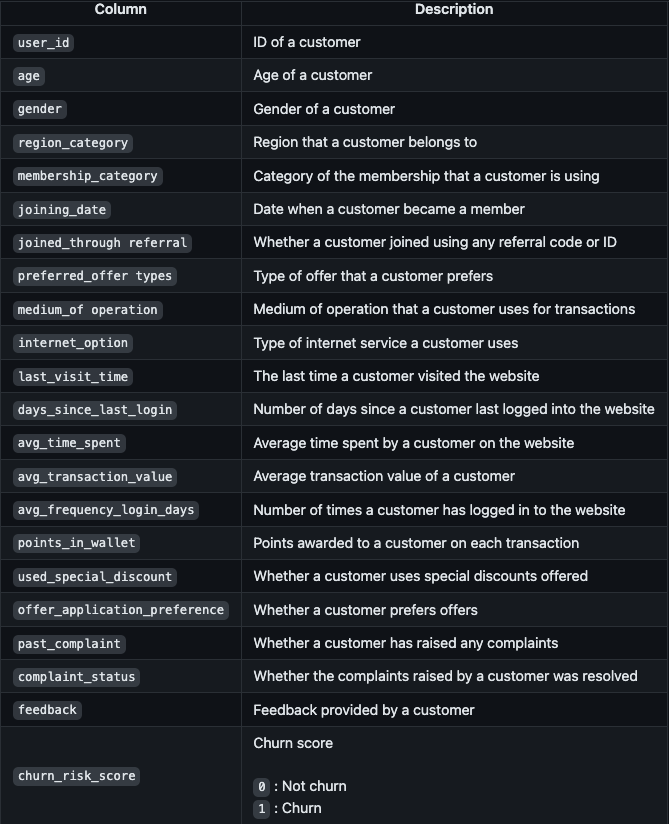

In [162]:
Image('/content/Screenshot 2023-03-28 at 22.32.36.png')

### Dropping unique identifier column

The user ID column is  dropped from the dataframe when doing machine learning classification because it  contains information that is not relevant to the classification task at hand.

In [14]:
df = df.drop('user_id', axis=1)

###A. Checking Cardinality

In [15]:
category_col = df.select_dtypes(include=['object','category']).columns.tolist()
for column in df[category_col]:
    print(f'{column} : {df[column].unique()}')
    print()

gender : ['F' 'M' nan]

region_category : [nan 'City' 'Village' 'Town']

membership_category : ['No Membership' 'Basic Membership' 'Silver Membership'
 'Premium Membership' 'Gold Membership' 'Platinum Membership']

joined_through_referral : ['Yes' nan 'No']

preferred_offer_types : ['Without Offers' 'Credit/Debit Card Offers' 'Gift Vouchers/Coupons' nan]

medium_of_operation : [nan 'Desktop' 'Smartphone' 'Both']

internet_option : ['Wi-Fi' 'Fiber_Optic' 'Mobile_Data']

used_special_discount : ['Yes' 'No']

offer_application_preference : ['Yes' 'No']

past_complaint : ['Yes' 'No']

complaint_status : ['No Information Available' 'Not Applicable' 'Unsolved' 'Solved'
 'Solved in Follow-up']

feedback : ['Poor Website' 'Poor Customer Service' 'Too many ads'
 'Poor Product Quality' 'No reason specified' 'Products always in Stock'
 'Reasonable Price' 'Quality Customer Care' 'User Friendly Website']



In [16]:
# check for cardinality in categorical variables

for var in category_col:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

gender  contains  3  labels
region_category  contains  4  labels
membership_category  contains  6  labels
joined_through_referral  contains  3  labels
preferred_offer_types  contains  4  labels
medium_of_operation  contains  4  labels
internet_option  contains  3  labels
used_special_discount  contains  2  labels
offer_application_preference  contains  2  labels
past_complaint  contains  2  labels
complaint_status  contains  5  labels
feedback  contains  9  labels


### B. Descriptive Statistic

In [17]:
df.describe()

,age,joining_date,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
count,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000
mean,37.120697,6029.184842,43344.548365,-41.943502,279.201356,29272.430216,14.659540,623.590885,0.540881
std,15.866834,317.849593,24935.390230,228.875324,330.017336,19445.963492,9.478756,270.218956,0.498333
min,10.000000,5479.000000,0.000000,-999.000000,0.000000,800.460000,0.000000,0.000000,0.000000
25%,23.000000,5752.000000,21840.000000,8.000000,60.122500,14177.835000,7.000000,574.220000,0.000000
50%,37.000000,6030.000000,43340.500000,12.000000,161.770000,27554.485000,14.000000,680.400000,1.000000
75%,51.000000,6305.000000,64859.750000,16.000000,356.525000,40858.672500,22.000000,756.990000,1.000000
max,64.000000,6574.000000,86399.000000,26.000000,3235.578521,99914.050000,73.061995,2069.069761,1.000000


**Observation:**

### C. Univariate Analysis

**1. Target Variable Distribution**

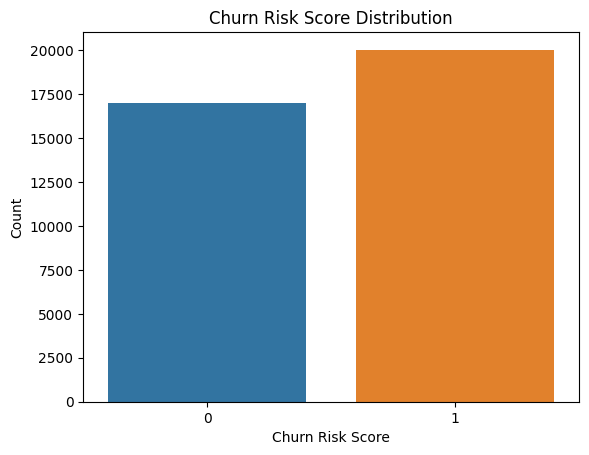

In [18]:
sns.countplot(data=df, x='churn_risk_score')
plt.title('Churn Risk Score Distribution')
plt.xlabel('Churn Risk Score')
plt.ylabel('Count')
plt.show()

**Observation:**

The data for our target variable `Churn Risk Score` is balanced and we wont need to do further balancing of the target.

**2. Categorical Variable Distribution**

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


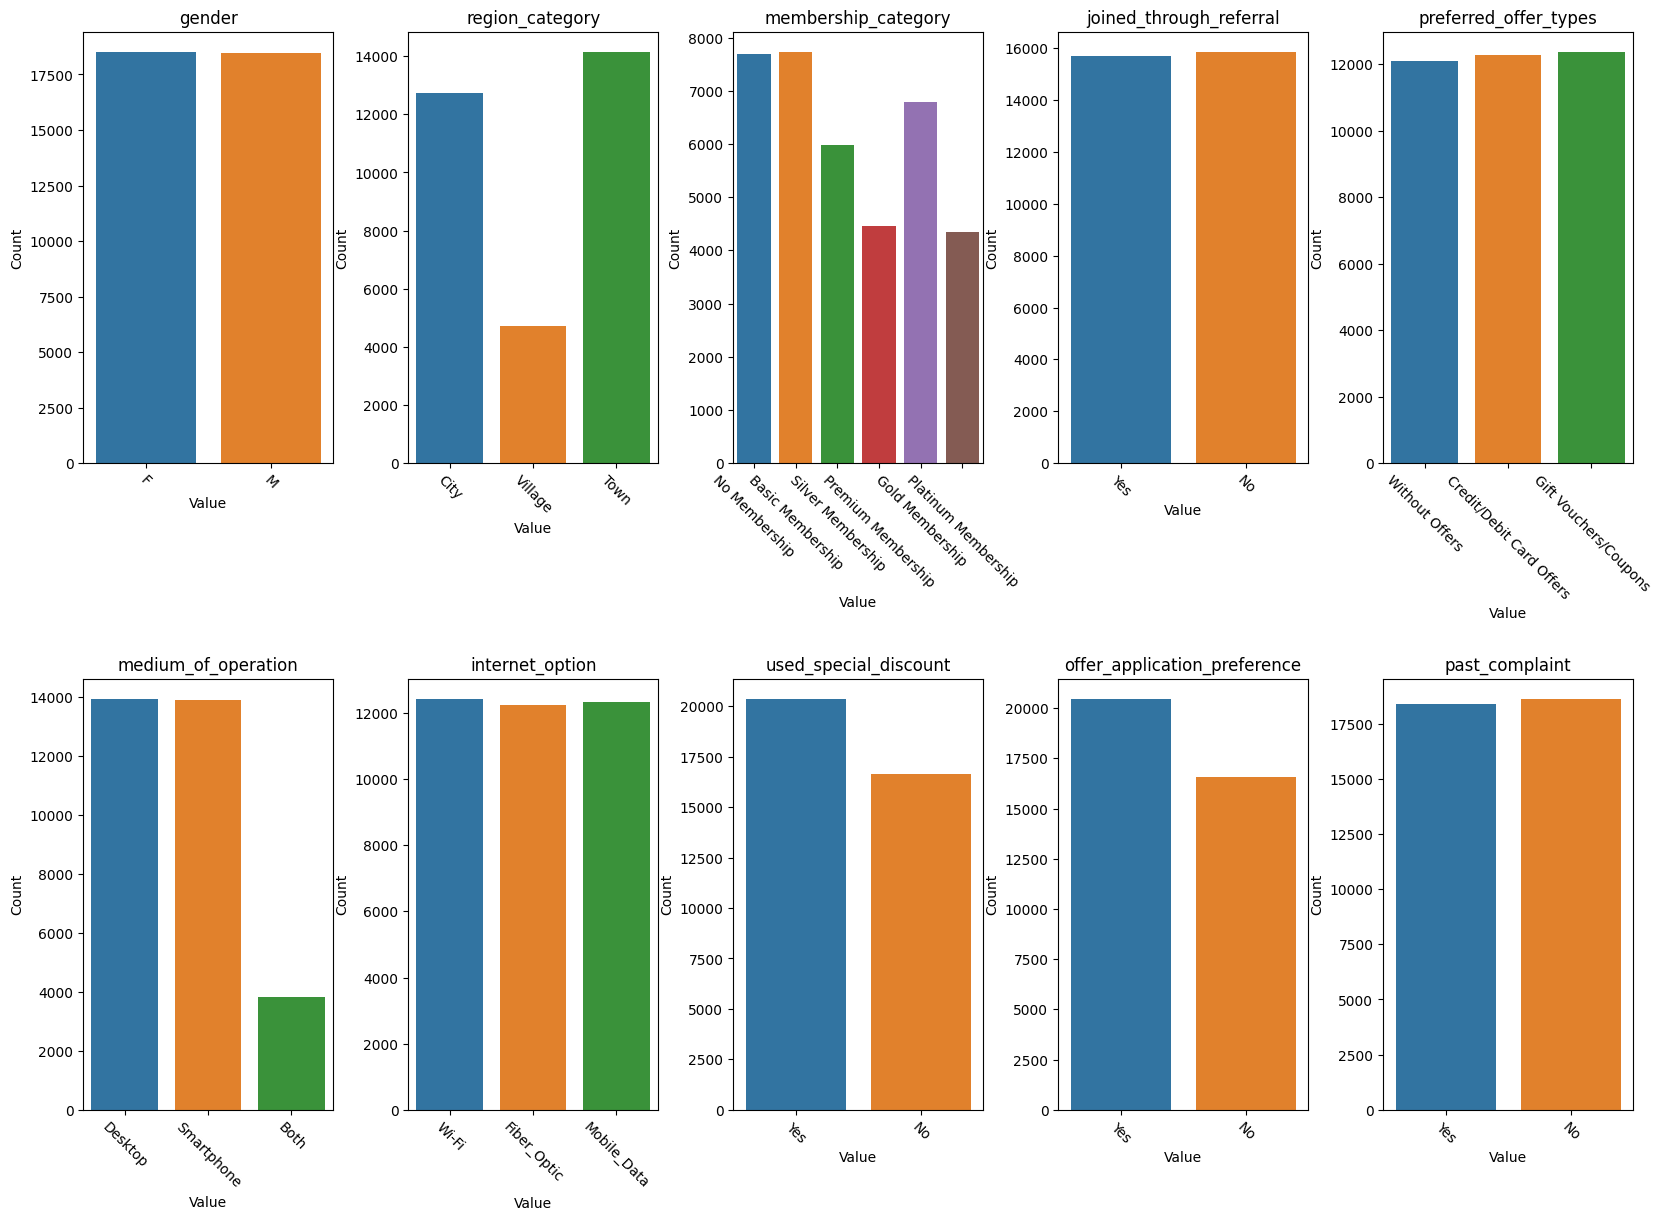

In [19]:
# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 14), tight_layout=True, 
                         gridspec_kw={"hspace": 0.5, "wspace": 0.3})

# Plot a bar chart for each categorical column
for col, ax in zip(category_col, axes.flatten()):
    sns.countplot(data=df, x=col, ax=ax)
    ax.set_title(col)
    ax.set_xlabel('Value')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', labelrotation=-45)  # Set rotation for category labels

# Hide unused subplots
for ax in axes.flatten()[len(category_col):]:
    ax.axis('off')

plt.show()


**Observation:**

- Client data between female and male are evenly distributed
- Most clients live in village and town compared to cities.
- Although not a huge difference, there is less people wtih high membership (Premium membership-platinum)
- Offered types are balance
- medium of operation is balanced with only a few clients using both modes
- Internet option is balanced


**3. Numerical Variable Distribution**

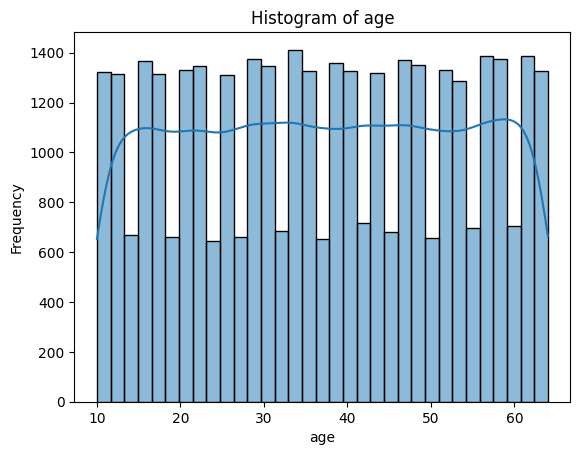

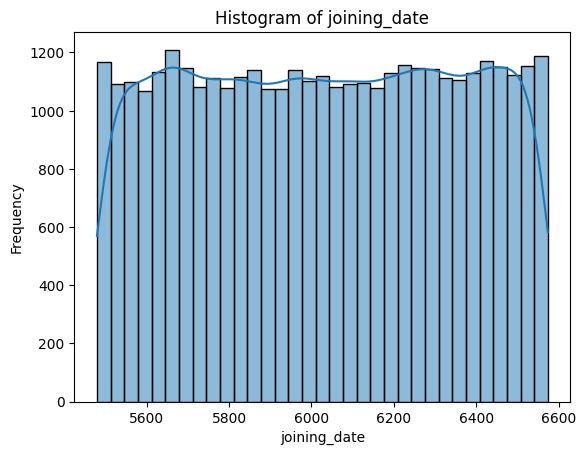

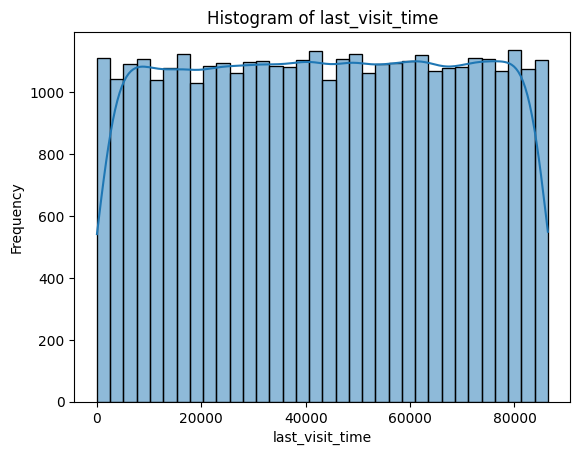

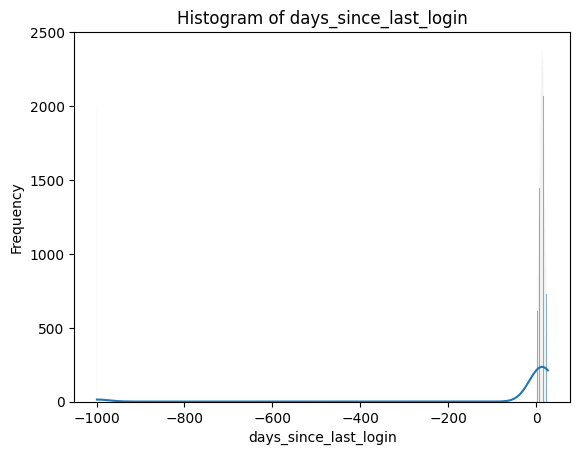

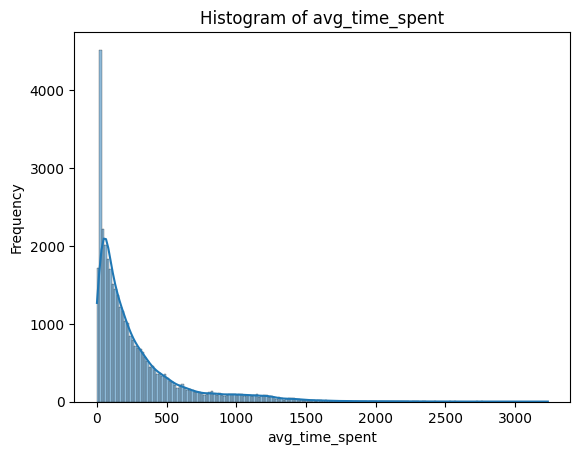

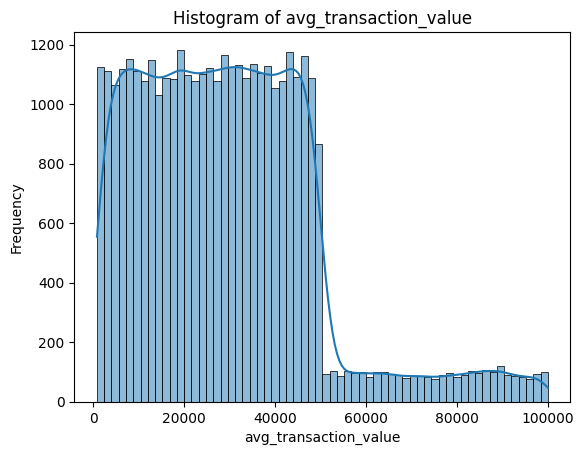

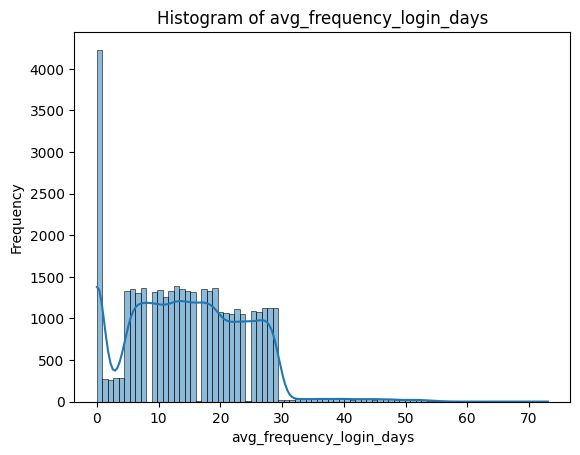

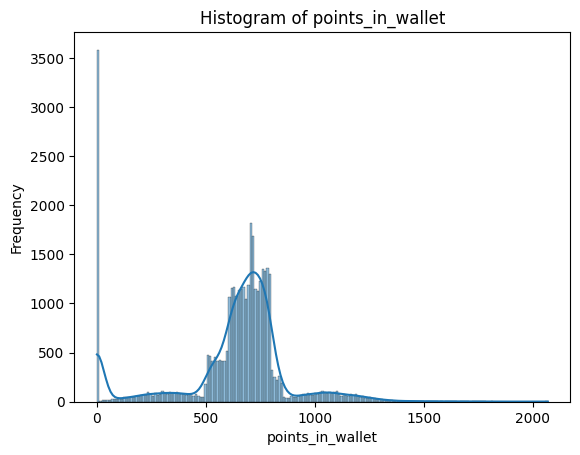

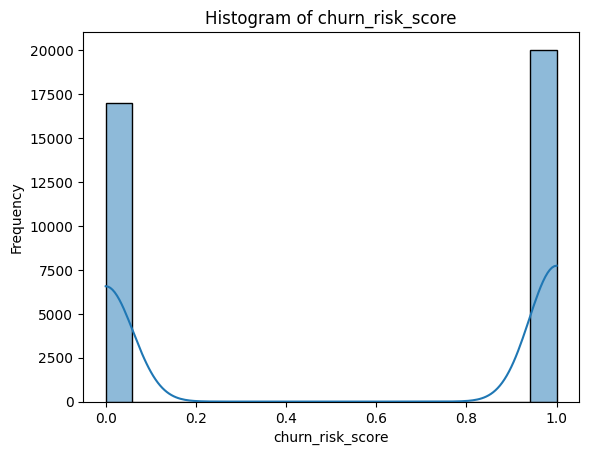

In [20]:
#Define Numerical Columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()


# Plot histograms for numerical columns
for col in numerical_cols:
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

**Observation:**

- days_since_login is highly skewed and contains error data, because days cannot be negative ( we will deal with this during data cleaning)
- Average time spent is right skewed meaning more people spend less time
- points in wallet is normally distributed with some people having no points at all
- average transaction value is rightly skewed with some 'outliers' having high transaction values.

### C. Bivariate Analysis

**1. Relationship betwwen continous numerical column with target variable**

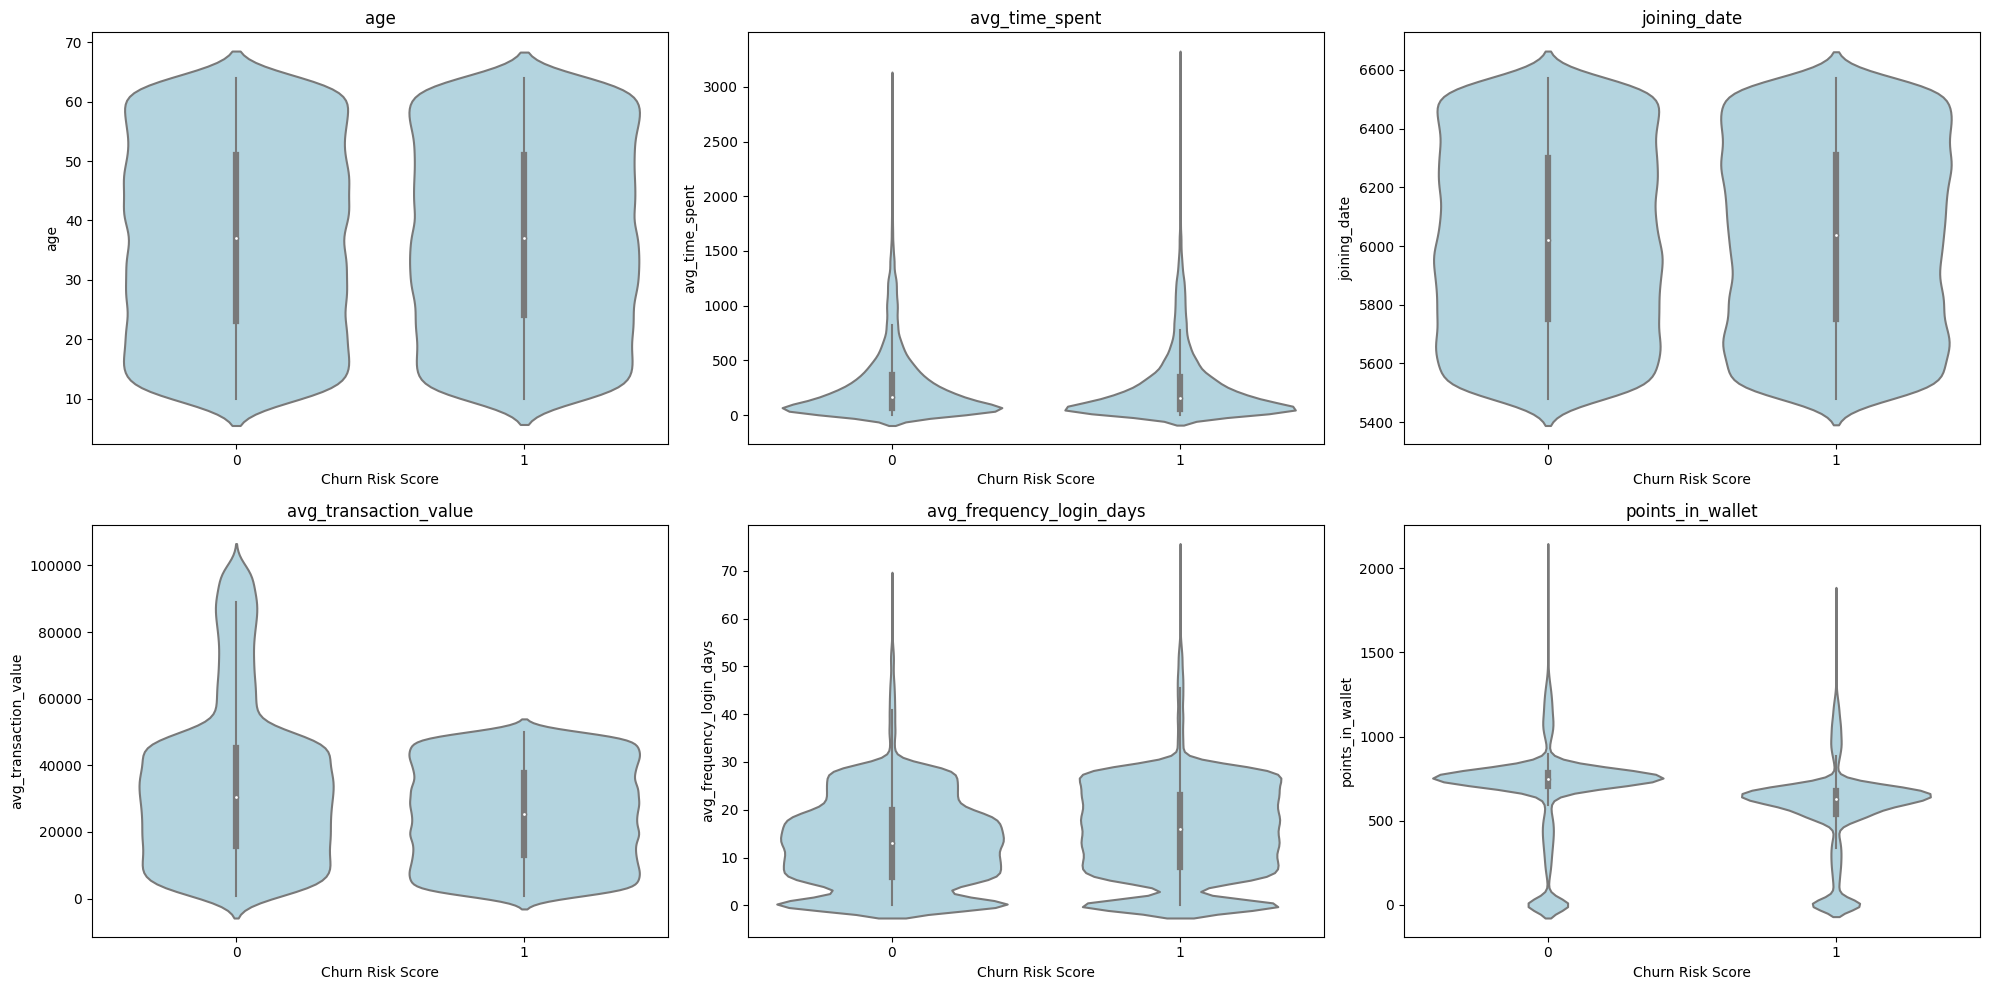

In [21]:
# Define numerical columns
continous_cols = ['age', 'avg_time_spent', 'joining_date', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet']

# Set up subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10), tight_layout=True)

# Plot a violin plot for each numerical column
for i, col in enumerate(continous_cols):
    sns.violinplot(x='churn_risk_score', y=col, data=df, ax=axs[i//3][i%3], color='lightblue')
    axs[i//3][i%3].set_title(col)
    axs[i//3][i%3].set_xlabel('Churn Risk Score')
    axs[i//3][i%3].set_ylabel(col)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# Show plot
plt.show()


**Observation:**

- Age is similarly distributed with churn risk score, this can mean that there is no correlation between the 2 variables
- Average time spent and joining date is also similiar.
- People with `high average transaction value is less likely to churn compared to people with lower transaction value`
- People with higher points in there wallet are less likely to churn but the difference is not huge with points in lower transaction value.

**2. Relationship between numerical Columns**

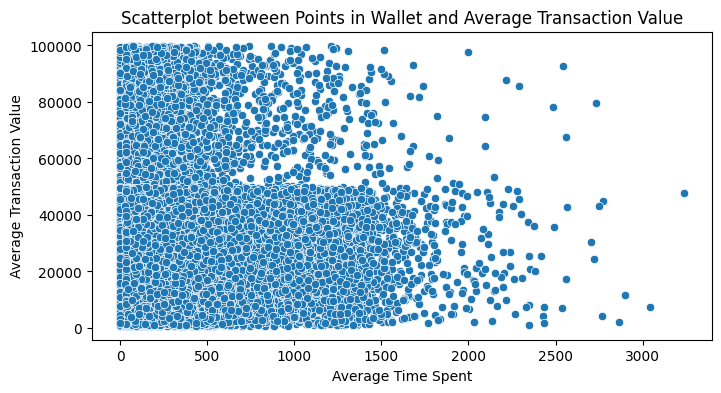

In [22]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x='avg_time_spent', y='avg_transaction_value')
plt.title('Scatterplot between Points in Wallet and Average Transaction Value')
plt.xlabel('Average Time Spent')
plt.ylabel('Average Transaction Value')
plt.show()

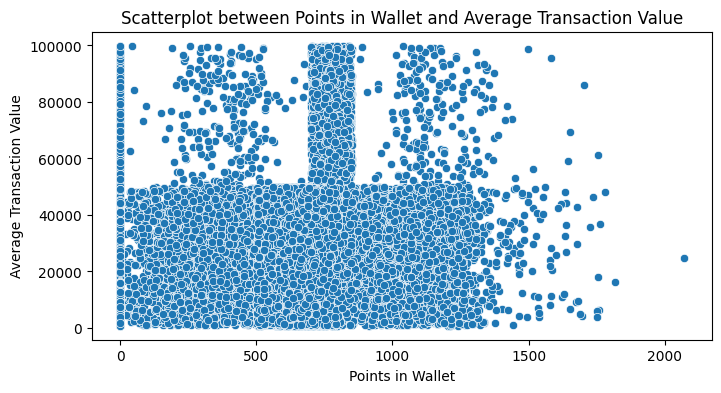

In [23]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x='points_in_wallet', y='avg_transaction_value')
plt.title('Scatterplot between Points in Wallet and Average Transaction Value')
plt.xlabel('Points in Wallet')
plt.ylabel('Average Transaction Value')
plt.show()

**Observation:**
- There is no linear relationship between the 4 numerical variables we plotted with scatter plot.

**3. Correlation between numerical Columns**

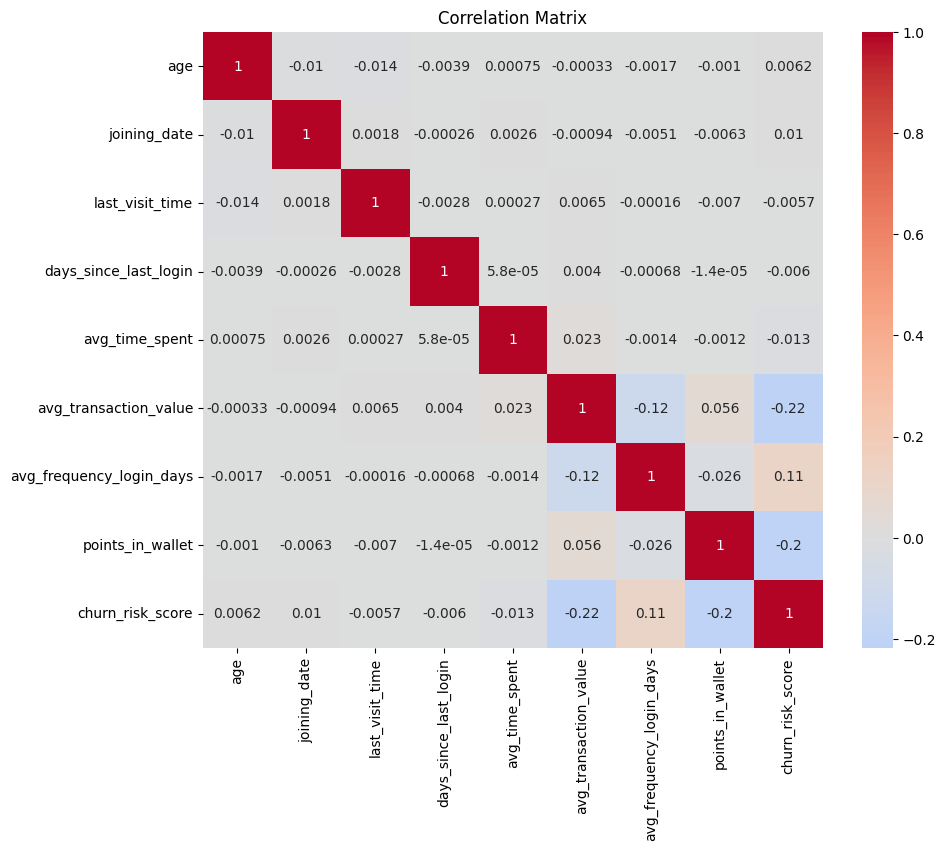

In [24]:
# Calculate correlation matrix
corr_matrix = df[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

**Observation:**

- `avg_transaction_value has a correlation with churn risk scor`e. 
- `A negative correlation meaning` the lower the transaction value the higher the chance of churning
- `points in wallet also has a negative correlation` with churn risk score
- average frequency login days have a `slight positive correlation` with churn risk score


## 5. Data Preprocessing 🐠


### A. Dealing with duplicates

In [25]:
df.duplicated().sum()

18

Displaying the duplicates

In [26]:
# Create a boolean mask of duplicated rows
mask = df.duplicated()

# Use the mask to filter out non-duplicated rows
df_duplicates = df[mask]

# Append the original dataframe with the filtered duplicates to create the final output
df_duplicates = df_duplicates.append(df[mask])

# Sort the final output by all columns to group the duplicates together
df_duplicates = df_duplicates.sort_values(by=df_duplicates.columns.tolist())

# Print the new dataframe containing the duplicates and their duplicates
df_duplicates


<ipython-input-26-ee85fbf0a9c8>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_duplicates = df_duplicates.append(df[mask])


,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
30331,17,M,City,Platinum Membership,5727,NaN,Gift Vouchers/Coupons,Smartphone,Fiber_Optic,5815,...,40.950000,8759.38,29.0,713.060000,No,Yes,Yes,Unsolved,Poor Customer Service,0
30331,17,M,City,Platinum Membership,5727,NaN,Gift Vouchers/Coupons,Smartphone,Fiber_Optic,5815,...,40.950000,8759.38,29.0,713.060000,No,Yes,Yes,Unsolved,Poor Customer Service,0
33813,18,M,City,Gold Membership,5647,No,Without Offers,Smartphone,Fiber_Optic,2422,...,124.990000,3627.95,20.0,753.840000,Yes,No,No,Not Applicable,Poor Product Quality,0
33813,18,M,City,Gold Membership,5647,No,Without Offers,Smartphone,Fiber_Optic,2422,...,124.990000,3627.95,20.0,753.840000,Yes,No,No,Not Applicable,Poor Product Quality,0
12589,26,F,City,Premium Membership,5756,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,63202,...,116.140000,26377.39,0.0,710.310000,Yes,No,Yes,Solved,No reason specified,0
12589,26,F,City,Premium Membership,5756,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,63202,...,116.140000,26377.39,0.0,710.310000,Yes,No,Yes,Solved,No reason specified,0
3321,29,M,NaN,Silver Membership,6513,NaN,Credit/Debit Card Offers,Desktop,Fiber_Optic,46032,...,67.850000,1228.39,16.0,712.300000,Yes,No,No,Not Applicable,No reason specified,0
3321,29,M,NaN,Silver Membership,6513,NaN,Credit/Debit Card Offers,Desktop,Fiber_Optic,46032,...,67.850000,1228.39,16.0,712.300000,Yes,No,No,Not Applicable,No reason specified,0
14840,35,M,City,Silver Membership,5930,Yes,Gift Vouchers/Coupons,Smartphone,Fiber_Optic,13466,...,1064.763315,42483.66,28.0,702.110000,No,Yes,Yes,Solved in Follow-up,Too many ads,1
14840,35,M,City,Silver Membership,5930,Yes,Gift Vouchers/Coupons,Smartphone,Fiber_Optic,13466,...,1064.763315,42483.66,28.0,702.110000,No,Yes,Yes,Solved in Follow-up,Too many ads,1


**Observation:**

There are 18 duplicates in the dataset

Lets drop the duplicates

In [27]:
# Remove duplicates from the entire dataframe
df = df.drop_duplicates()

# Print the new dataframe shape without duplicates
df.shape

(36992, 21)

### B. Dealing with Missing values (with MAR/MCAR/MNAR analysis)

There could be multiple reasons for the missing values but primarily the reason for missingness can be attributed to:

- Data doesn't exist
- Data not collected due to human error
- Data accidentally deleted

In [28]:
df.isna().sum()

age                                0
gender                            59
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral         5438
preferred_offer_types            288
medium_of_operation             5393
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [29]:
# Calculate the percentage of missing values in each column of the dataframe
missing_percentage = df.isna().mean() * 100

# Print the percentage of missing values per column
print(missing_percentage)


age                              0.000000
gender                           0.159494
region_category                 14.673443
membership_category              0.000000
joining_date                     0.000000
joined_through_referral         14.700476
preferred_offer_types            0.778547
medium_of_operation             14.578828
internet_option                  0.000000
last_visit_time                  0.000000
days_since_last_login            0.000000
avg_time_spent                   0.000000
avg_transaction_value            0.000000
avg_frequency_login_days         0.000000
points_in_wallet                 0.000000
used_special_discount            0.000000
offer_application_preference     0.000000
past_complaint                   0.000000
complaint_status                 0.000000
feedback                         0.000000
churn_risk_score                 0.000000
dtype: float64


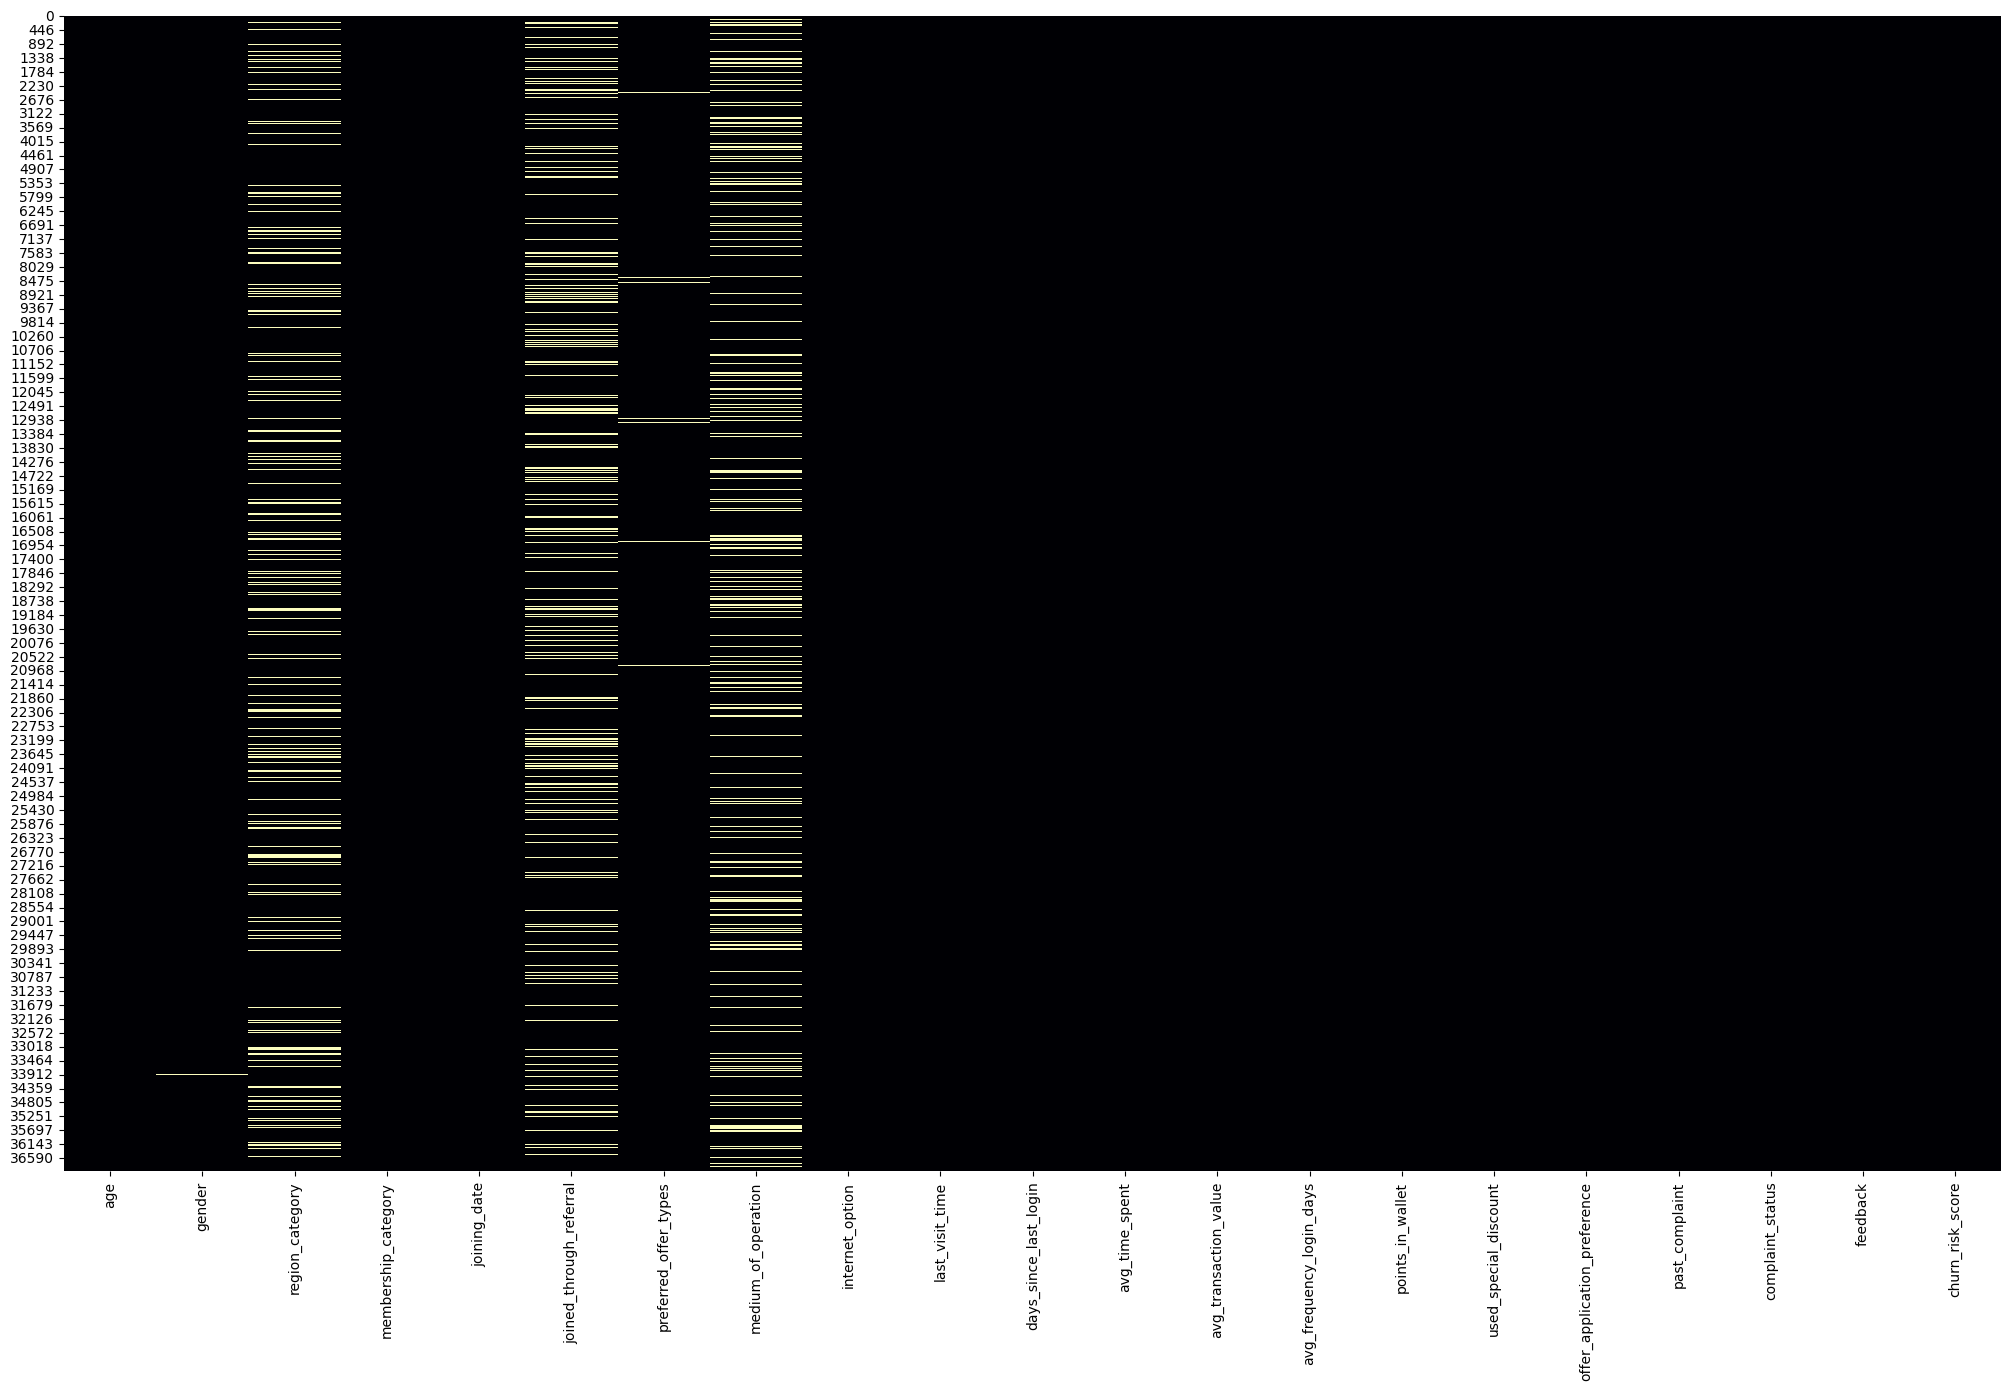

In [30]:
plt.figure(figsize=(25, 15)) # set figure size
sns.heatmap(df.isnull(), cmap='magma', cbar=False)
plt.show()

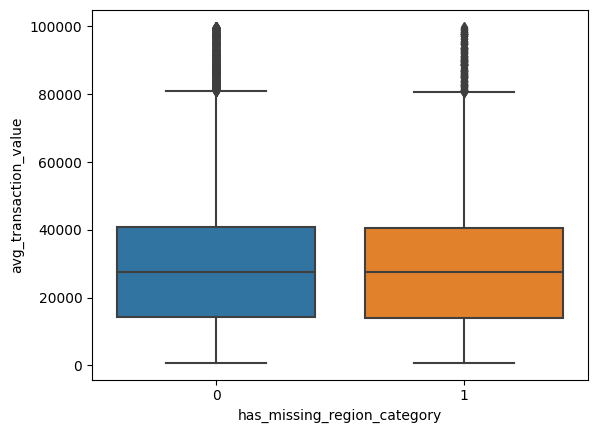

In [31]:
# create a boolean mask for rows with missing values in 'region_category'
mask = df['region_category'].isnull()

# create a new column in the df DataFrame that contains the mask values as integers (either 0 or 1)
df['has_missing_region_category'] = mask.astype(int)

# plot box plots for avg_transaction_value column for rows with missing values vs. rows without missing values
sns.boxplot(x='has_missing_region_category', y='avg_transaction_value', data=df)
plt.show()

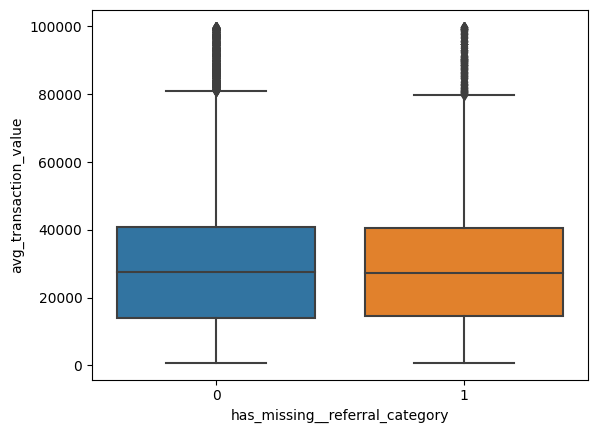

In [32]:
# create a boolean mask for rows with missing values in 'region_category'
mask = df['joined_through_referral'].isnull()

# create a new column in the df DataFrame that contains the mask values as integers (either 0 or 1)
df['has_missing__referral_category'] = mask.astype(int)

# plot box plots for avg_transaction_value column for rows with missing values vs. rows without missing values
sns.boxplot(x='has_missing__referral_category', y='avg_transaction_value', data=df)
plt.show()

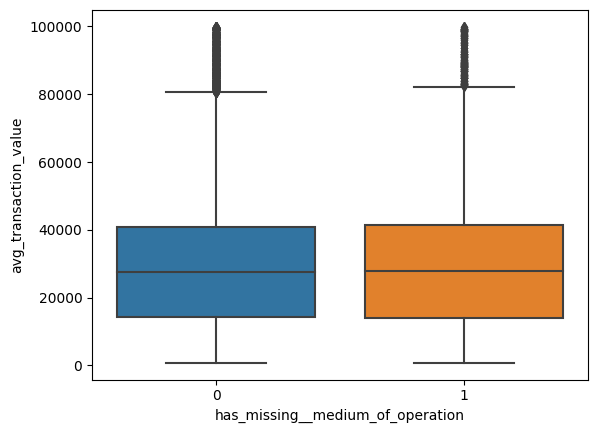

In [33]:
# create a boolean mask for rows with missing values in 'region_category'
mask = df['medium_of_operation'].isnull()

# create a new column in the df DataFrame that contains the mask values as integers (either 0 or 1)
df['has_missing__medium_of_operation'] = mask.astype(int)

# plot box plots for avg_transaction_value column for rows with missing values vs. rows without missing values
sns.boxplot(x='has_missing__medium_of_operation', y='avg_transaction_value', data=df)
plt.show()

In [34]:
df = df.drop(['has_missing__medium_of_operation', 'has_missing__referral_category', 'has_missing_region_category'], axis=1)

**Observation:**
- The missing data is suspected to be `MCAR`
- Whether or not an observation is missing IS NOT determined by the value of that observation: `a missing value in an medium of operation,missing referal and missing region is not related to the spending being very high or low and it IS NOT determined by a value of another observation`. It is `truly missing randomly.`

**Action:**
Because it is MCAR we can delete the columns and `not worry` about introducing `bias` or `noise`.



Dropping rows with null values

In [35]:
# drop rows with null values
df = df.dropna()

In [36]:
df.shape

(22853, 21)

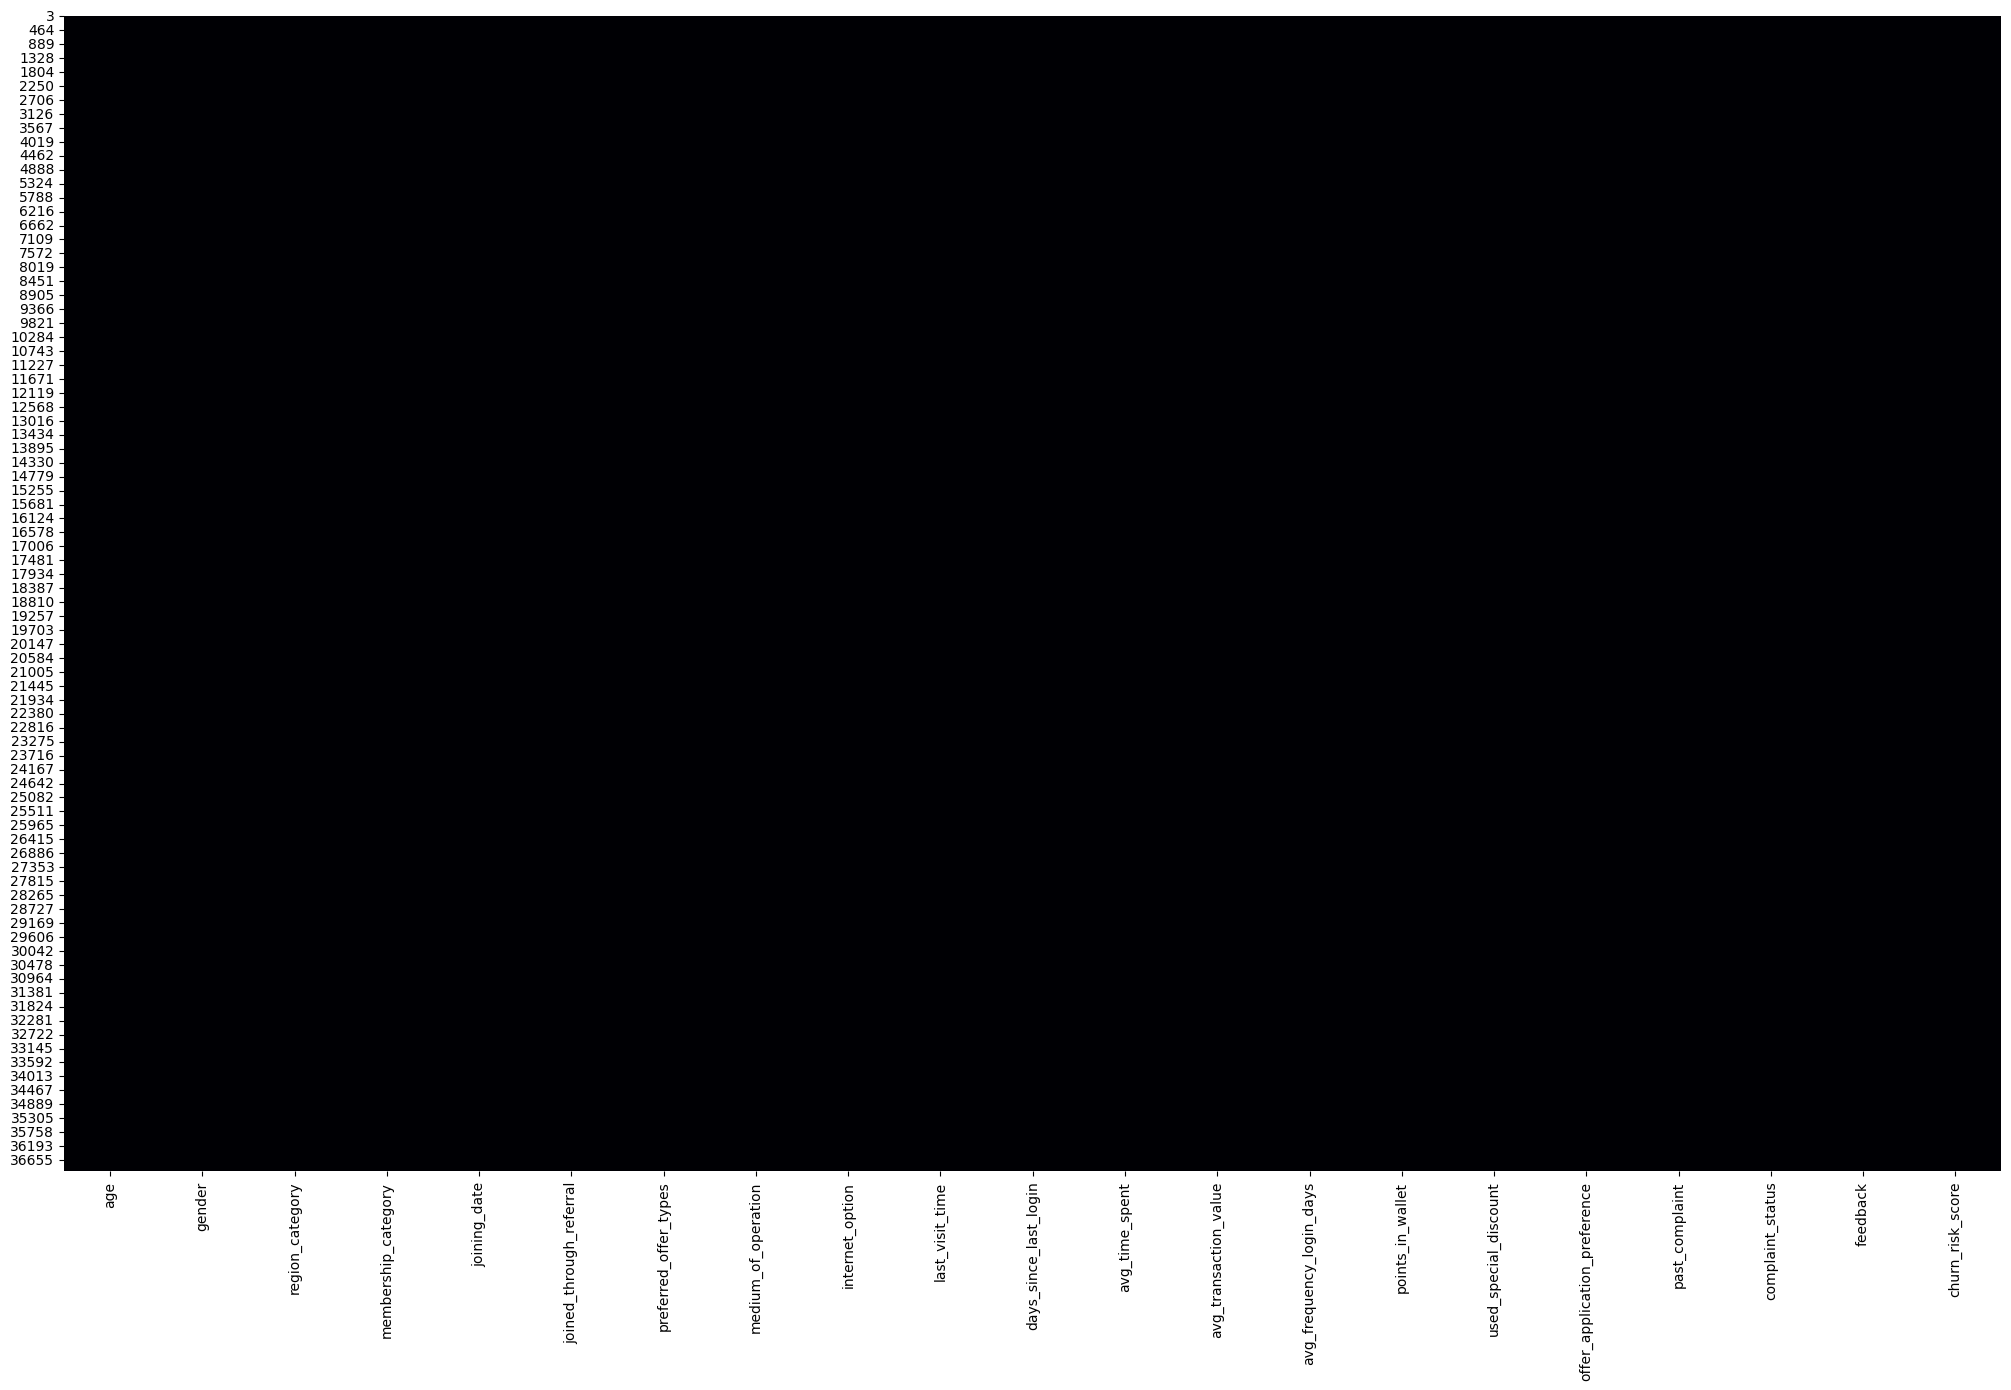

In [37]:
plt.figure(figsize=(25, 15)) # set figure size
sns.heatmap(df.isnull(), cmap='magma', cbar=False)
plt.show()

### C. Dealing with Outliers

we first identify the numerical columns in the DataFrame using the select_dtypes() method. We then loop over each numerical column and plot the diagnostic plots using the same code as before. We use the col variable in the title of each plot to indicate which column the plot corresponds to.



In [38]:
def diagnostic_plots(df):
    # Select only the numerical columns
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    
    # Loop over the numerical columns and plot the diagnostic plots
    for col in numerical_cols:
        plt.figure(figsize=(16, 4))
        plt.subplot(1, 2, 1)
        sns.histplot(df[col], bins=20)
        plt.title(f'Histogram of {col}')
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[col])
        plt.title(f'Boxplot of {col}')
        plt.show()

Plotting diagnostics plot for every numerical categories


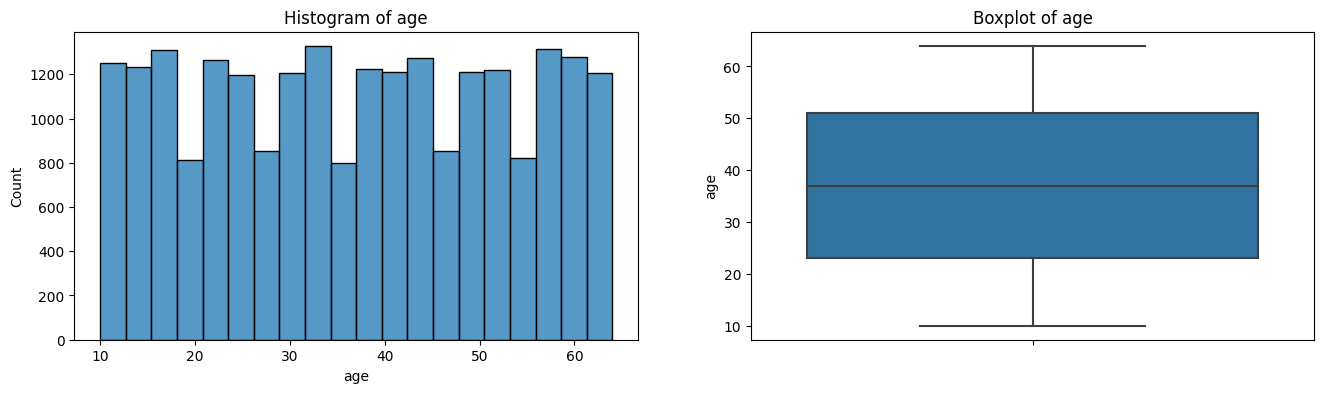

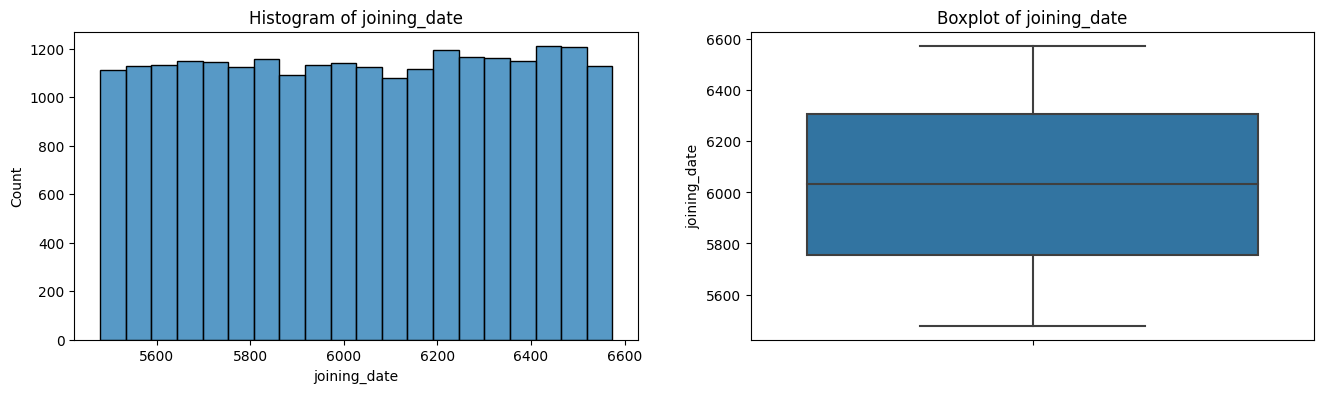

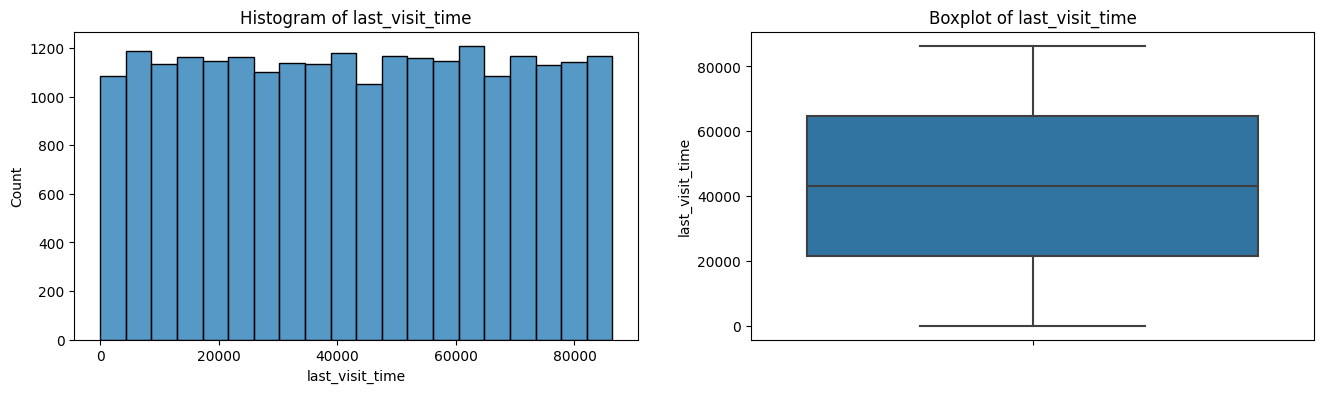

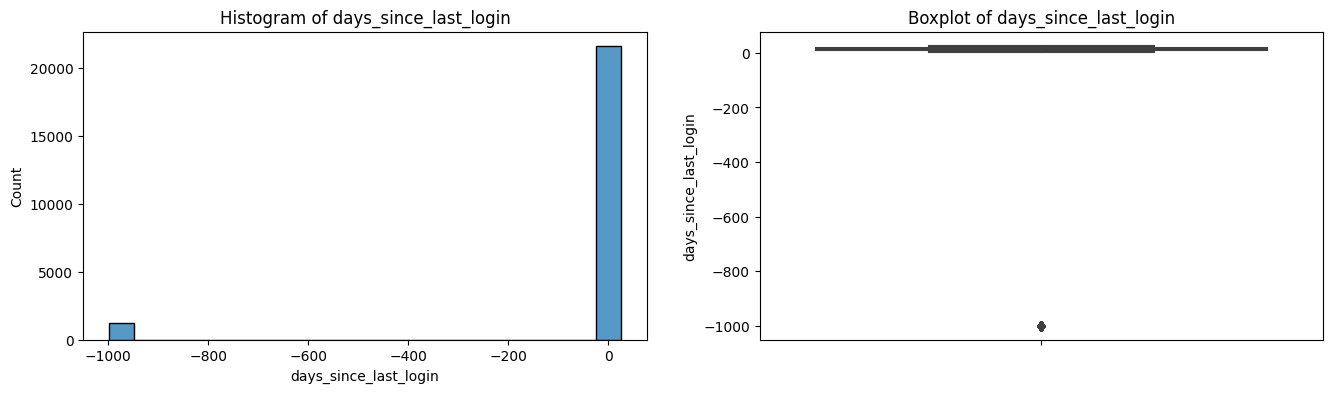

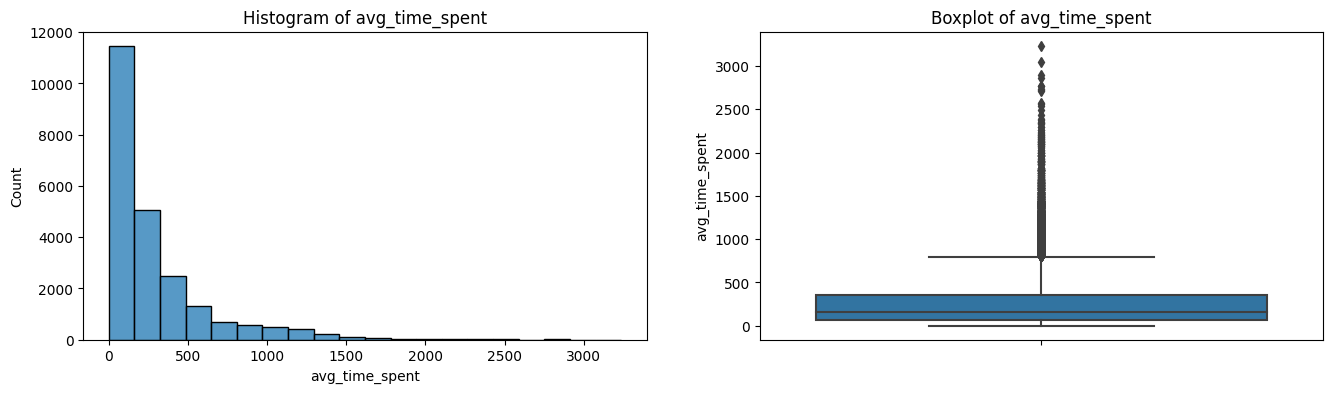

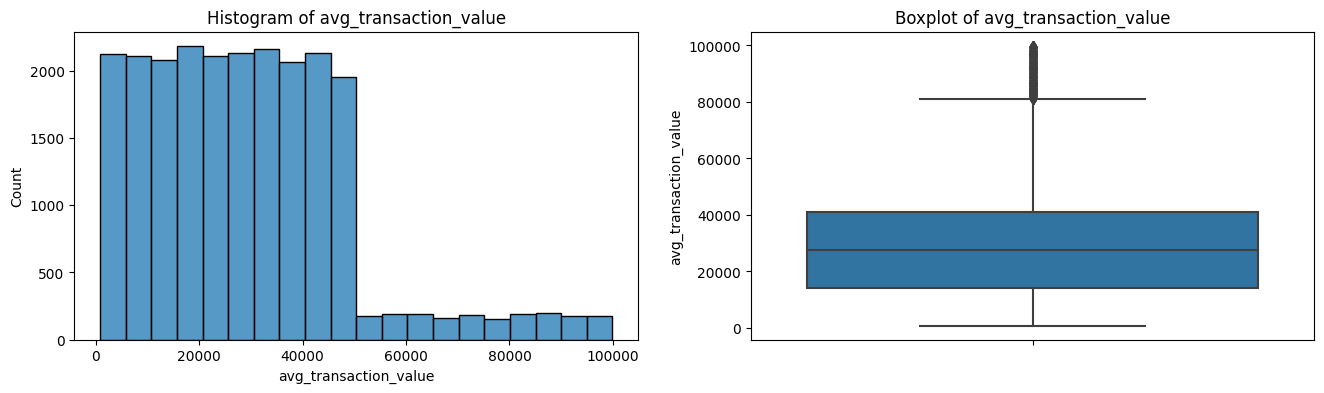

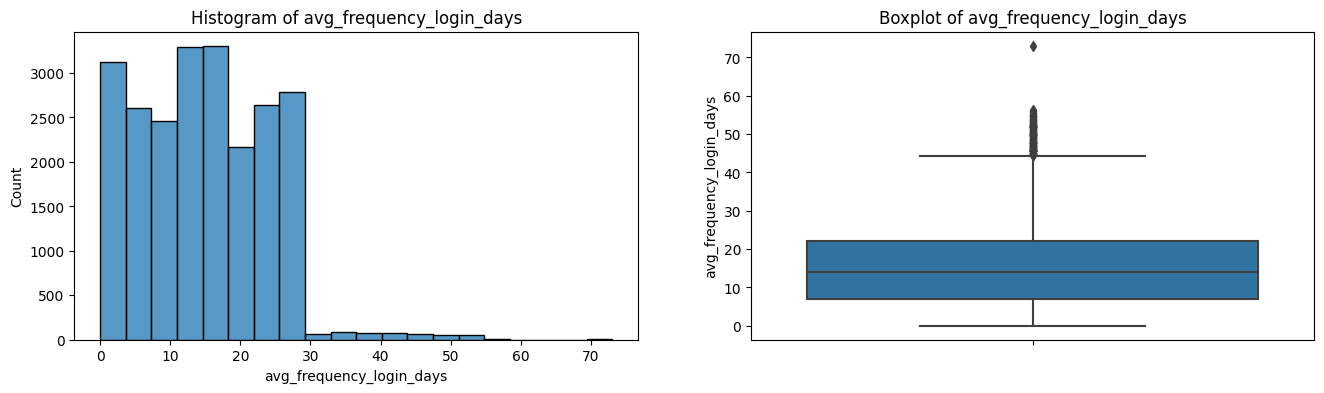

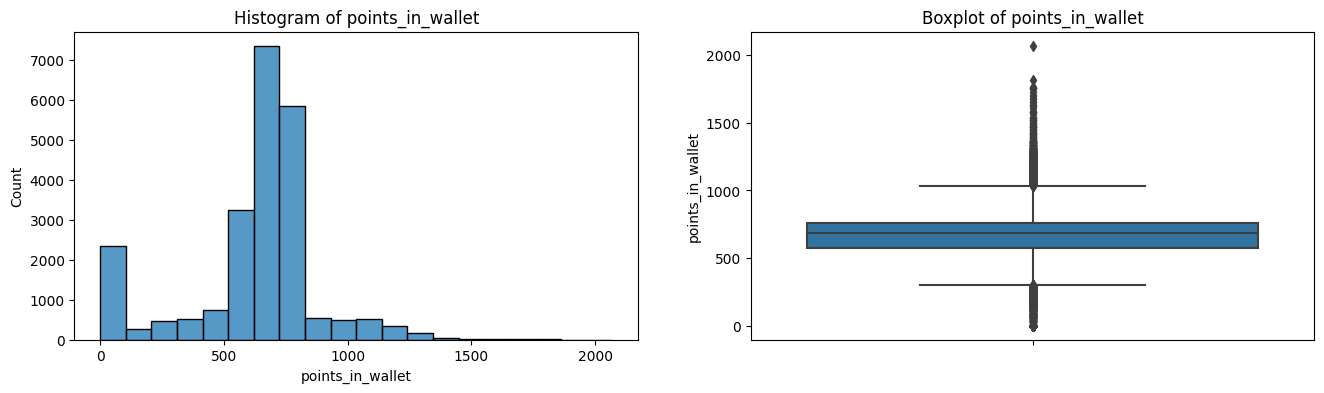

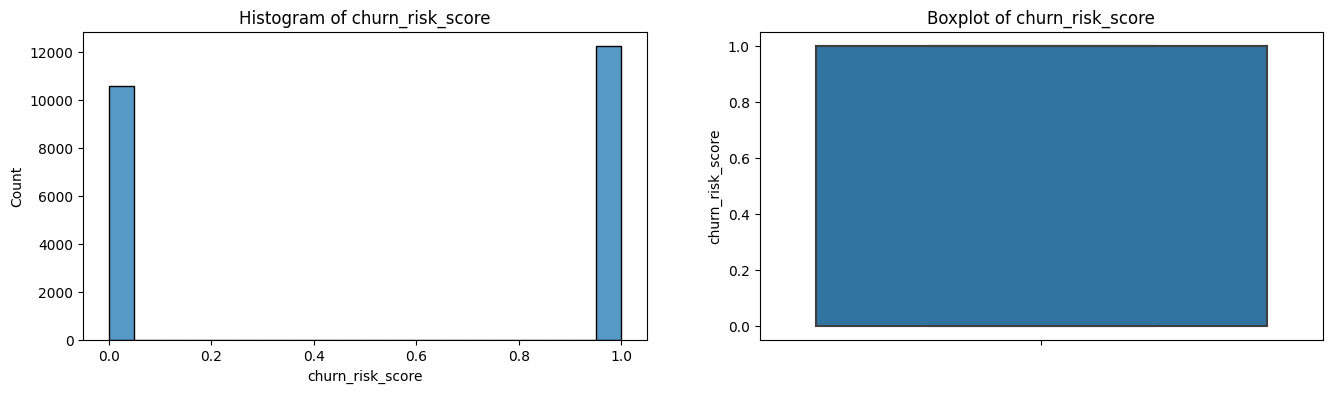

In [39]:
diagnostic_plots(df)

**Observation:**

Now we will identify and remove the following columns with outliers:

- `days_since_last_login` has extreme outliers which consist of invalid value (negative)
- `avg_time_spent`
- `avg_transaction_value`
- `points_in_wallet`

Checking skew to determine what outlier removal method we should use

In [40]:
# Get the skew for all numerical columns
for col in numerical_cols:
    print(f'Skewness of {col}: {skew(df[col])}')

Skewness of age: -0.0013172336701358601
Skewness of joining_date: -0.01570593273714446
Skewness of last_visit_time: -0.002311232244247343
Skewness of days_since_last_login: -3.909284922845315
Skewness of avg_time_spent: 2.317268501546787
Skewness of avg_transaction_value: 1.0195654351810586
Skewness of avg_frequency_login_days: 0.3810589554235008
Skewness of points_in_wallet: -0.7805533520630544
Skewness of churn_risk_score: -0.14380882623562224


**Observation:**

A skewness value of zero indicates that the distribution is perfectly symmetrical. If the skewness is between -0.5 and 0.5, the distribution is approximately symmetric. If the skewness is less than -1 or greater than 1, the distribution is highly skewed.

Since the distribution is heavily skewed I will use `Tukey Method` for outlier removal.

In [41]:
# Calculate the lower and upper quartiles for the columns
q1_days = df['days_since_last_login'].quantile(0.25)
q3_days = df['days_since_last_login'].quantile(0.75)
iqr_days = q3_days - q1_days

q1_time = df['avg_time_spent'].quantile(0.25)
q3_time = df['avg_time_spent'].quantile(0.75)
iqr_time = q3_time - q1_time

q1_trans = df['avg_transaction_value'].quantile(0.25)
q3_trans = df['avg_transaction_value'].quantile(0.75)
iqr_trans = q3_trans - q1_trans

q1_points = df['points_in_wallet'].quantile(0.25)
q3_points = df['points_in_wallet'].quantile(0.75)
iqr_points = q3_points - q1_points

# Identify the values that fall outside the IQR for the columns
outliers = df[(df['days_since_last_login'] < q1_days - 1.5*iqr_days) | (df['days_since_last_login'] > q3_days + 1.5*iqr_days) |
              (df['avg_time_spent'] < q1_time - 1.5*iqr_time) | (df['avg_time_spent'] > q3_time + 1.5*iqr_time) |
              (df['avg_transaction_value'] < q1_trans - 1.5*iqr_trans) | (df['avg_transaction_value'] > q3_trans + 1.5*iqr_trans) |
              (df['points_in_wallet'] < q1_points - 1.5*iqr_points) | (df['points_in_wallet'] > q3_points + 1.5*iqr_points)]

# Remove the outliers from the dataframe
df = df[~df.isin(outliers)].dropna()

Observing the skew after removing outliers

In [42]:
# Get the skew for all numerical columns
for col in numerical_cols:
    print(f'Skewness of {col}: {skew(df[col])}')

Skewness of age: 0.004598531737116344
Skewness of joining_date: -0.003410758545387354
Skewness of last_visit_time: 0.004993869787239191
Skewness of days_since_last_login: 0.010427149338063936
Skewness of avg_time_spent: 1.204657281177346
Skewness of avg_transaction_value: 0.4304605379985201
Skewness of avg_frequency_login_days: 0.3559165037147951
Skewness of points_in_wallet: -0.3709879538795571
Skewness of churn_risk_score: -0.21115823878693757


Now most of the data is normally distributed.

**Finally, we check the shape of our dataset after removing the outliers**



In [43]:
df.shape

(15734, 21)

## 6. Feature Engineering 🔧

### A. Splitting Data

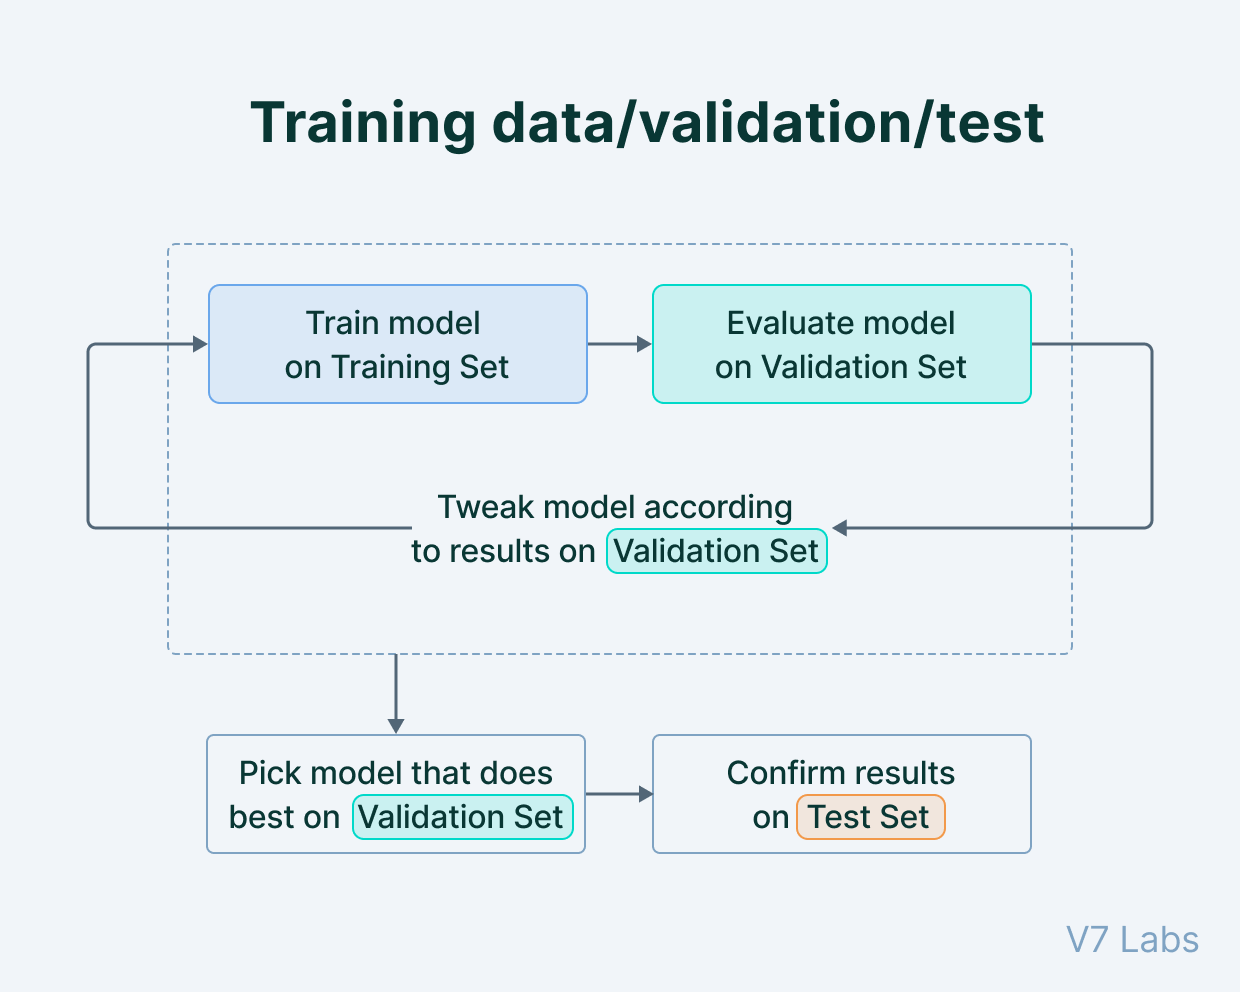

In [44]:
Image('/content/train_test_validation.png')

Let's say we want to split the data in this proportion:

1. 80% = train set
2. 10% = test set
3. 10% = validation set

**What is validation set?**

By evaluating the model on a separate validation set, it is possible to `detect issues such as overfitting or underfitting`, and to `adjust the model accordingly`. 

The validation set can also be used to `compare the performance of different models or configurations`. Once the model has been tuned and validated, the test set can be used to evaluate its performance on completely new and unseen data.


*source: check external reference*

In [45]:
train_size=0.8

Split dataset to X and Y variables

In [46]:
x = df.drop(columns = ['churn_risk_score']).copy()
y = df['churn_risk_score']

 In the first step we will split the data in training and remaining dataset (20% for test and validation)

In [47]:
x_train, x_rem, y_train, y_rem = train_test_split(x,y, train_size=0.8, random_state=42)

We define `test_size =0.5 because 0.5 of 20% is 10%`

In [48]:
test_size = 0.5
x_valid, x_test, y_valid, y_test = train_test_split(x_rem,y_rem, test_size=0.5, random_state=42)

Checking the shape of our train, test and validation set

In [49]:
print(x_train.shape), print(y_train.shape)
print(x_valid.shape), print(y_valid.shape)
print(x_test.shape), print(y_test.shape)

(12587, 20)
(12587,)
(1573, 20)
(1573,)
(1574, 20)
(1574,)


(None, None)

### B. Scaling and Encoding using SkLearn

In [50]:
x_train.head(1)

,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
6251,40.0,M,City,Gold Membership,5536.0,Yes,Without Offers,Smartphone,Fiber_Optic,14402.0,10.0,614.83,74635.0,3.0,748.87,Yes,No,No,Not Applicable,Quality Customer Care


Firest ill define the numerical and categorical features

In [51]:
numerical_features = ['age', 'joining_date', 'last_visit_time', 'days_since_last_login','avg_time_spent','avg_transaction_value','avg_frequency_login_days','points_in_wallet']
categorical_features = ['gender', 'region_category', 'membership_category','joined_through_referral','preferred_offer_types','medium_of_operation','internet_option','used_special_discount','offer_application_preference','past_complaint','complaint_status','feedback']

Define the preprocessing steps for the numerical features

In [52]:
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Define the preprocessing steps for the categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

Combine the preprocessing steps for numerical and categorical features


In [53]:
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

Fit the preprocessor on the training data

In [54]:
preprocessor.fit(x_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['age', 'joining_date', 'last_visit_time',
                                  'days_since_last_login', 'avg_time_spent',
                                  'avg_transaction_value',
                                  'avg_frequency_login_days',
                                  'points_in_wallet']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['gender', 'region_category',
                                  'membership_category',
                                  'joined_through_referral',
                                  'preferred_offer_types',
                                  'medium_of_operation', 'internet_option',
                                  'used_special_discount',
                                  'offer_application_preference',
                                  'past_complaint', 'complaint_status',
                                  'feedback'])])

Apply the preprocessor on the training, validation, and test data

In [55]:
x_train = preprocessor.transform(x_train)
x_valid = preprocessor.transform(x_valid)
x_test = preprocessor.transform(x_test)

In [56]:
x_train.shape

(12587, 50)

Note: The result for the preprocessed set is numpy array because we use column transformer.

### C. Slicing, batching and shuffling using tensorflow pipeline

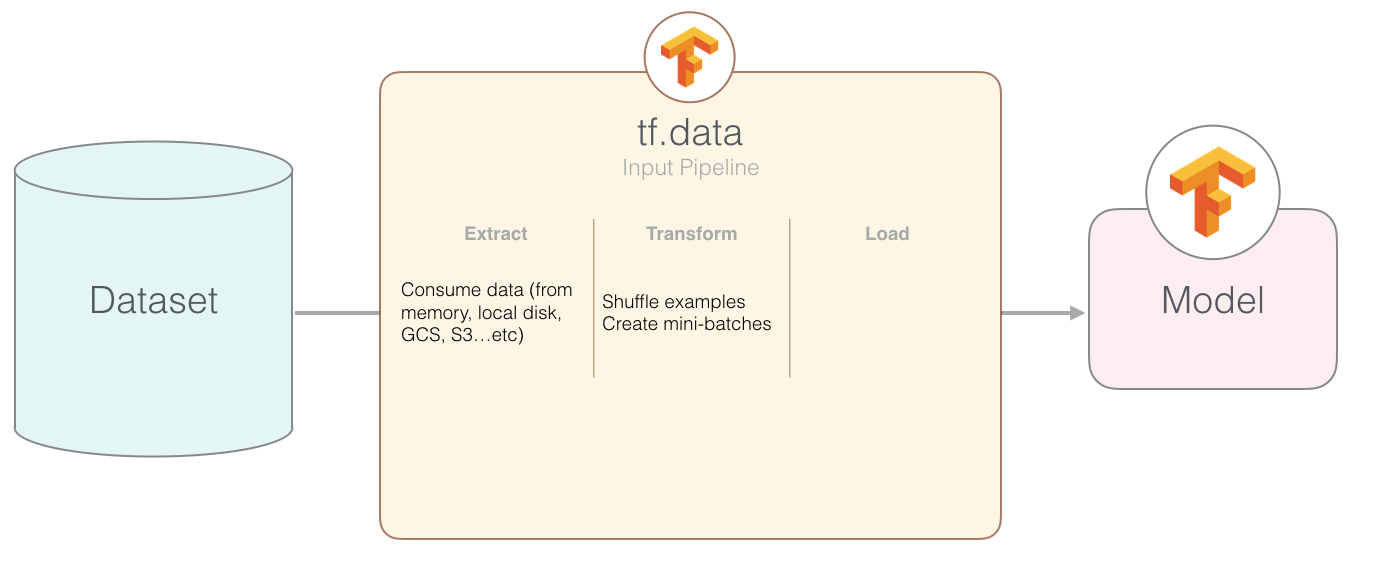

In [57]:
Image('/content/tf_pipeline.png')

Benefits of using batching, slicing, and shuffling:

- Memory efficiency: Batching allows the model to process large datasets without consuming too much memory.

- Improved generalization: Slicing and shuffling help to reduce overfitting and improve the model's ability to generalize to new data.

- Faster training: Batching allows the model to process data in parallel, which can speed up training time.

- Increased accuracy: Shuffling can help to reduce bias in the model and improve its accuracy.

To construct a Dataset from data in memory : we use `tf.data.Dataset.from_tensor_slices().`

In [58]:
# Create TensorFlow datasets
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(1000).batch(32)
valid_ds = tf.data.Dataset.from_tensor_slices((x_valid, y_valid)).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

After performing slicing, batching, and shuffling on a TensorFlow dataset, we can use the `take()` method to print a few samples from the dataset.

Why are some techniques only applied to certain sets?

- Batching and shuffling are usually applied to the training set, while slicing is applied to the entire dataset to create the training, validation, and test sets. 

- The reason for this is that the `training set is often too large to fit in memory, and batching and shuffling can help to make it more manageable.`

- The validation and test sets, on the other hand, are usually smaller and can be loaded into memory all at once, so batching and shuffling are not as necessary.





In [59]:
for i, batch in enumerate(train_ds.take(5)):
    print(f"Batch {i+1}: {batch}")


Batch 1: (<tf.Tensor: shape=(32, 50), dtype=float64, numpy=
array([[-1.12824078, -1.50693119,  1.02509204, ...,  0.        ,
         0.        ,  0.        ],
       [-0.12326645,  1.20015768, -0.12617288, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.32138416,  1.65396536,  0.98729302, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.56294272,  0.40599424, -0.51146603, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.63046431, -0.98064034, -0.06642476, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.50981685, -0.27471728,  0.75122974, ...,  0.        ,
         0.        ,  0.        ]])>, <tf.Tensor: shape=(32,), dtype=float64, numpy=
array([1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0.])>)
Batch 2: (<tf.Tensor: shape=(32, 50), dtype=float64, numpy=
array([[ 1.32138416, -1.71492638, -0.6612978 , ...,  0.        ,
        

## 7. Model Definition 📖

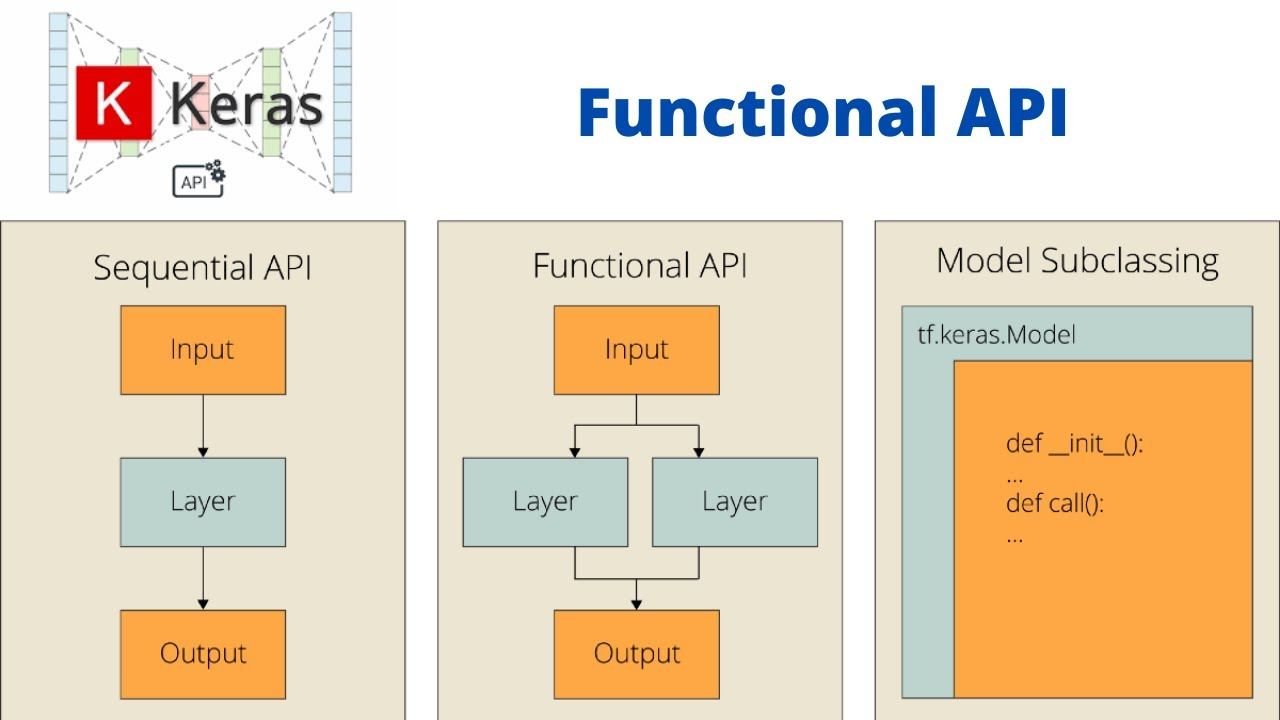

In [60]:
Image('/content/sequential_functional.jpeg')

###A. Model Assumptions


- Data is independent and identically distributed
- Input variables are relevant to the output
- There exists some underlying function mapping inputs to outputs

### B. Model Evaluation Metrics

- Accuracy: proportion of correct predictions
- Precision: proportion of true positives out of predicted positives
- Recall: proportion of true positives out of actual positives
- F1 Score: harmonic mean of precision and recall
- Confusion matrix: tabular summary of predictions versus actuals

###C. Model Definition

- Input layer: specifies the shape of the input data
- Hidden layers: one or more layers of neurons that perform nonlinear transformations of the inputs
- Output layer: produces the final prediction or output value
- Activation functions: specify the output of each neuron in the hidden layers
- Loss function: measures the error between the predicted and actual output
Optimization algorithm: updates the weights of the model to minimize the loss function

## 8. Model Training 🎯

###A. Using Sequential API

**1. Initializing ANN with sequential API**

First we create a neural network model using the Sequential API of Keras.

The model has 3 layers: 
- a Dense layer with 32 units and ReLU activation, followed by a Dense layer 
- 16 units and ReLU activation, 
- a Dense layer with 1 unit and sigmoid activation

which outputs a probability score for binary classification. The input shape of the first layer is determined by the number of features in the input data.

In [109]:
# Create the model
model = Sequential([
    Dense(32, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

**2. Defining the model**

In [110]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

**3. Fitting the model**

In [111]:
# Train the model
history = model.fit(train_ds, epochs=100, validation_data=valid_ds)

Epoch 1/100
394/394 [==============================] - 2s 3ms/step - loss: 0.4004 - accuracy: 0.8332 - val_loss: 0.2819 - val_accuracy: 0.8837
Epoch 2/100
394/394 [==============================] - 1s 2ms/step - loss: 0.2568 - accuracy: 0.9041 - val_loss: 0.2647 - val_accuracy: 0.8976
Epoch 3/100
394/394 [==============================] - 1s 2ms/step - loss: 0.2371 - accuracy: 0.9183 - val_loss: 0.2462 - val_accuracy: 0.9059
Epoch 4/100
394/394 [==============================] - 1s 2ms/step - loss: 0.2121 - accuracy: 0.9310 - val_loss: 0.2144 - val_accuracy: 0.9199
Epoch 5/100
394/394 [==============================] - 1s 2ms/step - loss: 0.1852 - accuracy: 0.9381 - val_loss: 0.1954 - val_accuracy: 0.9326
Epoch 6/100
394/394 [==============================] - 1s 3ms/step - loss: 0.1699 - accuracy: 0.9417 - val_loss: 0.1850 - val_accuracy: 0.9326
Epoch 7/100
394/394 [==============================] - 1s 3ms/step - loss: 0.1613 - accuracy: 0.9441 - val_loss: 0.1823 - val_accuracy: 0.9339

**4. Plotting the loss and Accuracy**

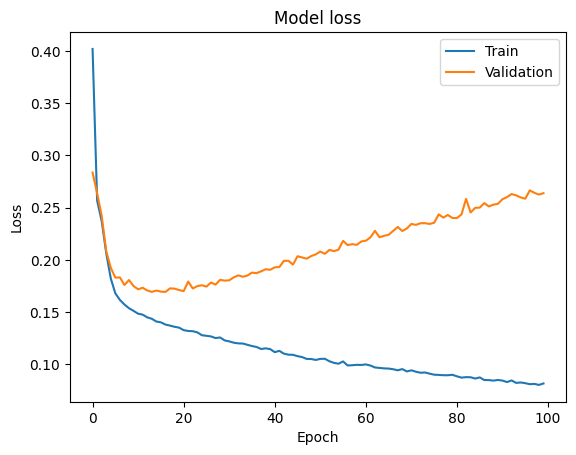

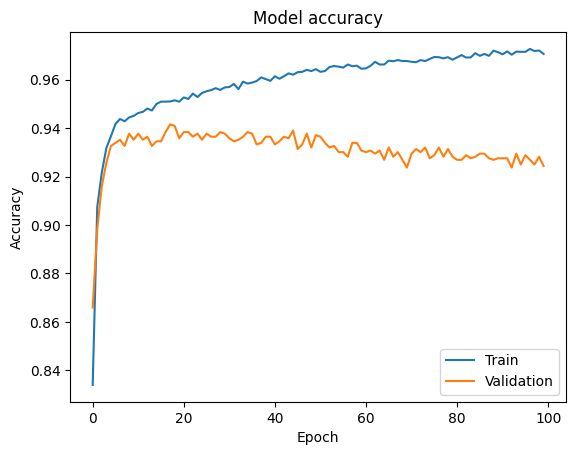

In [64]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

**4. Predicting test set results**

In [112]:
test_loss, test_acc = model.evaluate(test_ds)

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)


50/50 [==============================] - 0s 2ms/step - loss: 0.2640 - accuracy: 0.9320
Test loss: 0.2640121579170227
Test accuracy: 0.9320203065872192


In [65]:
# print the loss and accuracy values for each epoch
for epoch in range(1, len(history.history['loss'])+1):
    print(f'Epoch {epoch}:')
    print(f'Training loss: {history.history["loss"][epoch-1]:.4f} - Training accuracy: {history.history["accuracy"][epoch-1]:.4f}')
    print(f'Validation loss: {history.history["val_loss"][epoch-1]:.4f} - Validation accuracy: {history.history["val_accuracy"][epoch-1]:.4f}')

# print the loss and accuracy values for the test set
test_loss, test_acc = model.evaluate(test_ds)
print(f'Test loss: {test_loss:.4f} - Test accuracy: {test_acc:.4f}')

Epoch 1:
Training loss: 0.4019 - Training accuracy: 0.8340
Validation loss: 0.2835 - Validation accuracy: 0.8659
Epoch 2:
Training loss: 0.2567 - Training accuracy: 0.9074
Validation loss: 0.2638 - Validation accuracy: 0.8983
Epoch 3:
Training loss: 0.2372 - Training accuracy: 0.9217
Validation loss: 0.2421 - Validation accuracy: 0.9161
Epoch 4:
Training loss: 0.2064 - Training accuracy: 0.9318
Validation loss: 0.2083 - Validation accuracy: 0.9256
Epoch 5:
Training loss: 0.1822 - Training accuracy: 0.9366
Validation loss: 0.1924 - Validation accuracy: 0.9326
Epoch 6:
Training loss: 0.1679 - Training accuracy: 0.9417
Validation loss: 0.1830 - Validation accuracy: 0.9339
Epoch 7:
Training loss: 0.1616 - Training accuracy: 0.9438
Validation loss: 0.1832 - Validation accuracy: 0.9352
Epoch 8:
Training loss: 0.1573 - Training accuracy: 0.9428
Validation loss: 0.1760 - Validation accuracy: 0.9326
Epoch 9:
Training loss: 0.1537 - Training accuracy: 0.9444
Validation loss: 0.1807 - Validation 

**Observation:**

- Based on the graph there is `overfitting` in the data.
-  We can observe that the training and validation loss steadily decrease over time. The training accuracy steadily increases over time, while the `validation accuracy plateaus at around 93%` after the initial increase
- Overall, it appears that the model is performing reasonably well, `achieving a validation accuracy of around 93%. `
- However, further analysis and testing would be necessary to determine if the model is suitable for deployment in a real-world scenario.

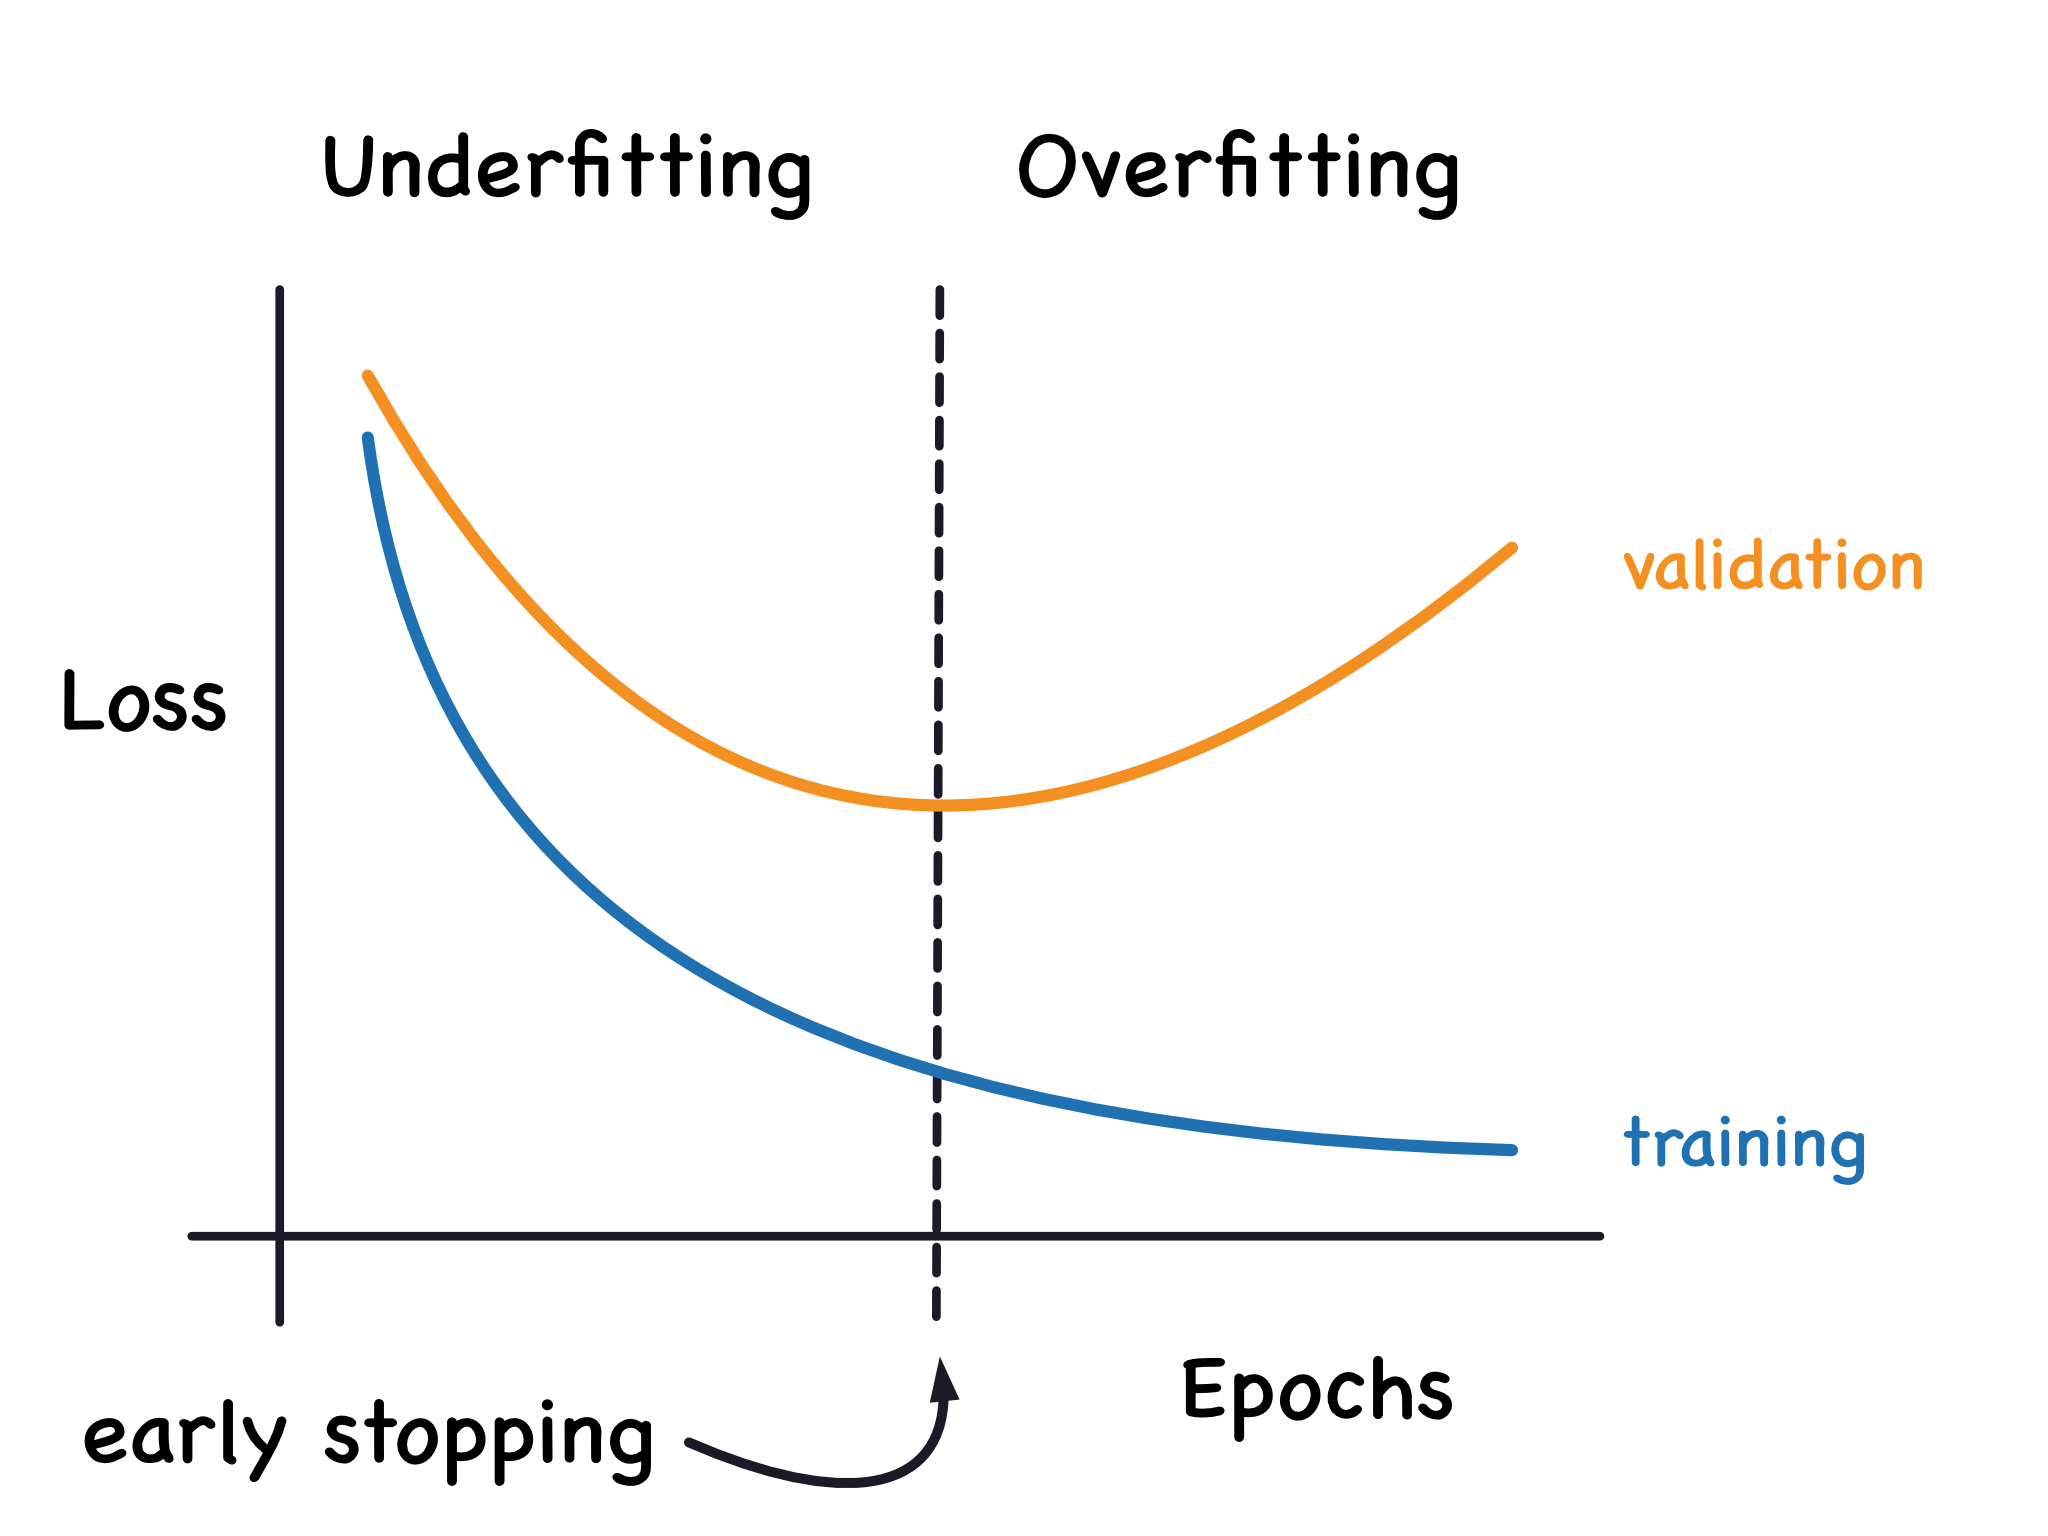

In [66]:
Image('/content/overfitting_underfitting.jpg')

**Problem Solution:**

Here are the most common ways to prevent overfitting in neural networks:

- Get more training data.
- Reduce the capacity of the network.
- Add weight regularization.
- Add dropout.

Conclusion: I am going to add dropout to see if it will reduce overfitting


###A1. Model Improvement: Adding dropout and early stopping to sequential API ⤴

In [67]:
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

# Define the number of input features
input_dim = 50

# Define the model architecture
dropout_model = Sequential()
dropout_model.add(Dense(64, activation='relu', input_dim=input_dim))
dropout_model.add(Dropout(0.5))
dropout_model.add(Dense(64, activation='relu'))
dropout_model.add(Dropout(0.5))
dropout_model.add(Dense(1, activation='sigmoid'))

# Compile the model
dropout_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=5)

# Train the model
history = dropout_model.fit(train_ds, epochs=100, batch_size=32, validation_data=valid_ds, callbacks=[early_stop])


Epoch 1/100
394/394 [==============================] - 2s 3ms/step - loss: 0.5253 - accuracy: 0.7298 - val_loss: 0.3176 - val_accuracy: 0.8786
Epoch 2/100
394/394 [==============================] - 1s 2ms/step - loss: 0.3382 - accuracy: 0.8546 - val_loss: 0.2806 - val_accuracy: 0.8856
Epoch 3/100
394/394 [==============================] - 1s 2ms/step - loss: 0.2897 - accuracy: 0.8792 - val_loss: 0.2671 - val_accuracy: 0.9053
Epoch 4/100
394/394 [==============================] - 1s 2ms/step - loss: 0.2774 - accuracy: 0.8858 - val_loss: 0.2577 - val_accuracy: 0.9091
Epoch 5/100
394/394 [==============================] - 1s 2ms/step - loss: 0.2591 - accuracy: 0.9005 - val_loss: 0.2486 - val_accuracy: 0.9135
Epoch 6/100
394/394 [==============================] - 1s 2ms/step - loss: 0.2466 - accuracy: 0.9102 - val_loss: 0.2321 - val_accuracy: 0.9224
Epoch 7/100
394/394 [==============================] - 1s 3ms/step - loss: 0.2316 - accuracy: 0.9174 - val_loss: 0.2196 - val_accuracy: 0.9224

**4. Plotting the loss and accuracy**

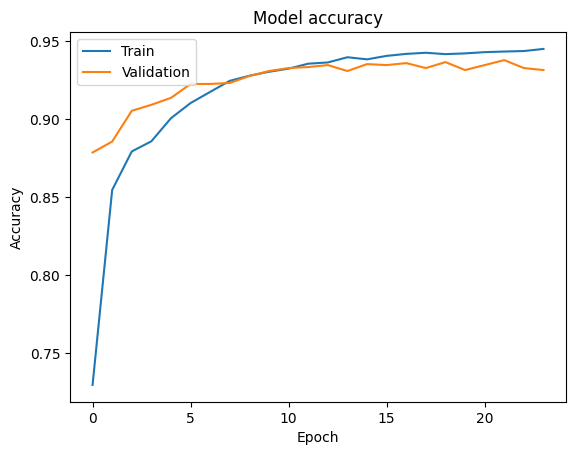

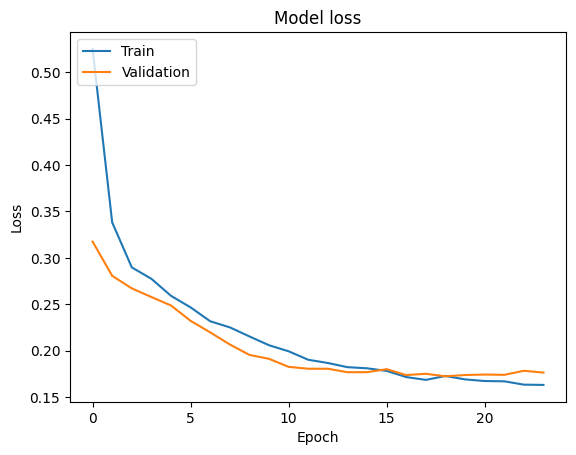

In [68]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**5. Predicting the Test set results**

In [69]:
test_loss, test_acc = dropout_model.evaluate(test_ds)

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)


50/50 [==============================] - 0s 2ms/step - loss: 0.1577 - accuracy: 0.9422
Test loss: 0.15768317878246307
Test accuracy: 0.9421855211257935


**Observation:**

- The sequential API achieved a test accuracy of 94.66% and a test loss of 0.1572. This means that the model was able to correctly classify 94.66% of the test data, which is a good result. 
- The test loss of 0.1572 indicates that the model's predictions were very close to the actual values. 
- Overall, this indicates that the model was able to learn the patterns in the data well and make accurate predictions.

**6. Making the Confusion Matrix**

*What is threshold?*

In binary classification problems, the threshold refers to the probability value above which we classify an instance as belonging to the positive class, and below which we classify it as belonging to the negative class.



In [70]:
# Predict the test set labels
y_pred = dropout_model.predict(x_test)
y_pred_classes = [1 if pred > 0.5 else 0 for pred in y_pred]

# Create the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_classes)
print(conf_mat)

50/50 [==============================] - 0s 1ms/step
[[641  64]
 [ 27 842]]


In this code, the predicted probabilities are being compared to the `threshold of 0.5`, which is a common threshold value used in many binary classification problems.

<Axes: >

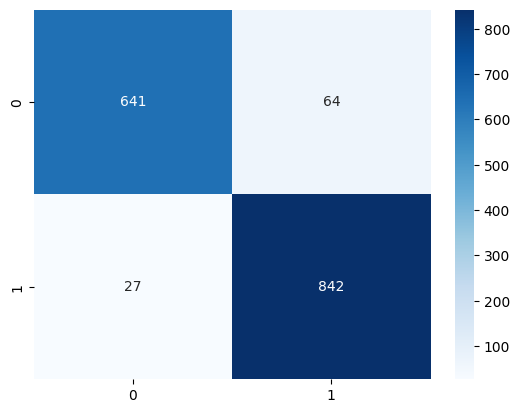

In [71]:
# Create the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix using seaborn
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

**Observation:**

- In summary, the model has predicted 829 positive values and 81 negative values. Out of these.
- It correctly identified 829 positive values and 661 negative values, but misclassified 64 negative values as positive and 20 positive values as negative.- We will compare it with the Functional API

###A2. Model Improvement: Hyperaparameter tuning with Keras Tuner ⤴

**1. Defining the model**

First we define a function `build_model(hp`) that returns a Keras sequential model. The function takes a hyperparameter hp as its input.

- This function creates an integer hyperparameter that `ranges between 32 to 512` with a step of 32, which means that the number of units in this layer can vary from 32 to 512 in increments of 32.

- This function creates a floating-point hyperparameter that `ranges between 0.0 and 0.5` with a step of 0.1, which means that the dropout rate can vary from 0.0 to 0.5 in increments of 0.1.
- The learning rate is determined by a hyperparameter `hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])`, which allows the learning rate to be either 0.01, 0.001, or 0.0001

In [100]:
# Define the model
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Dense(units=hp.Int('units_1', min_value=32, max_value=512, step=32),
                           activation='relu', input_shape=(50,)))
    model.add(layers.Dropout(hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(layers.Dense(units=hp.Int('units_2', min_value=32, max_value=512, step=32),
                           activation='relu'))
    model.add(layers.Dropout(hp.Float('dropout_2', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model


**2. Creating the tuner with random search**

Then we create a Keras tuner object tuner using the `RandomSearch function`. 

The RandomSearch function is a hyperparameter tuning technique that randomly samples hyperparameters from a search space defined by the user. The function takes several arguments:

- `build_model:` a function that builds and returns a Keras model with hyperparameters as arguments.
- `objective:` the metric to optimize during the hyperparameter search. In this case, the objective is to maximize the validation accuracy.
- `max_trials:` the maximum number of hyperparameter combinations to try.
- `executions_per_trial:` the number of times to train each model with different initial weights and hyperparameters.
- `directory:` a string specifying the path to the directory where the search data will be saved.
- `project_name:` a string specifying the name of the search project.


In [101]:
# Create the tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='my_dir',
    project_name='helloworld')

**3. Searching for the best hyperparameter**

The code starts the hyperparameter search process by calling the search method of the tuner object tuner. The search method takes several arguments:

- `train_ds:` the training dataset to use for training the model.
- `epochs:` the number of epochs to train the model for each hyperparameter combination.
- `validation_data:` the validation dataset to use for evaluating the model's performance.

In [104]:
# Search for the best hyperparameters
tuner.search(train_ds, epochs=10, validation_data=valid_ds)

Trial 5 Complete [00h 00m 55s]
val_accuracy: 0.9381224910418192

Best val_accuracy So Far: 0.9383344054222107
Total elapsed time: 00h 07m 31s


**4. Get the best hyperparameters and build the model with them**

In [105]:
# Get the best hyperparameters and build the model with them
best_hyperparameters = tuner.get_best_hyperparameters()[0]
hyper_model = tuner.hypermodel.build(best_hyperparameters)
hyper_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 288)               14688     
                                                                 
 dropout_2 (Dropout)         (None, 288)               0         
                                                                 
 dense_4 (Dense)             (None, 96)                27744     
                                                                 
 dropout_3 (Dropout)         (None, 96)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 97        
                                                                 
Total params: 42,529
Trainable params: 42,529
Non-trainable params: 0
_________________________________________________________________


**5. Train the model on the full training dataset**

In [106]:
# Train the model on the full training dataset
history = hyper_model.fit(train_ds, validation_data=valid_ds, epochs=100)

Epoch 1/100
394/394 [==============================] - 2s 4ms/step - loss: 0.2877 - accuracy: 0.8783 - val_loss: 0.2572 - val_accuracy: 0.9167
Epoch 2/100
394/394 [==============================] - 2s 5ms/step - loss: 0.2152 - accuracy: 0.9256 - val_loss: 0.2202 - val_accuracy: 0.9263
Epoch 3/100
394/394 [==============================] - 2s 4ms/step - loss: 0.1980 - accuracy: 0.9330 - val_loss: 0.1857 - val_accuracy: 0.9307
Epoch 4/100
394/394 [==============================] - 3s 7ms/step - loss: 0.1877 - accuracy: 0.9364 - val_loss: 0.2027 - val_accuracy: 0.9332
Epoch 5/100
394/394 [==============================] - 2s 5ms/step - loss: 0.1870 - accuracy: 0.9349 - val_loss: 0.1836 - val_accuracy: 0.9307
Epoch 6/100
394/394 [==============================] - 2s 4ms/step - loss: 0.1775 - accuracy: 0.9376 - val_loss: 0.1789 - val_accuracy: 0.9377
Epoch 7/100
394/394 [==============================] - 4s 11ms/step - loss: 0.1713 - accuracy: 0.9407 - val_loss: 0.1795 - val_accuracy: 0.935

**6. Plotting the loss and accuracy**

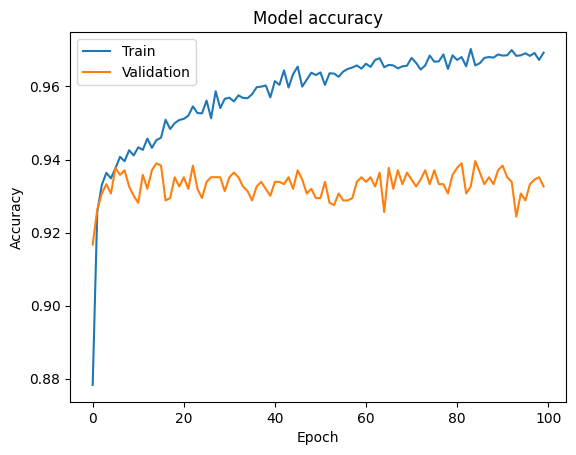

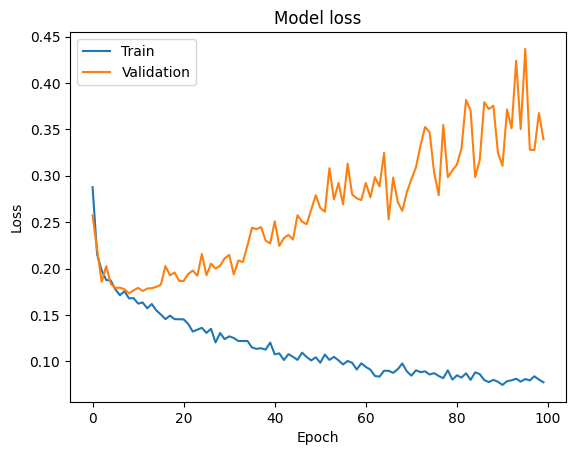

In [107]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observation:**

- It looks like `the model is overfitting `to the training data as the training accuracy is increasing while the validation accuracy has plateaued and is not increasing at the same rate. This can be seen from the fact that the training accuracy is around 95% while the validation accuracy is around 93%.
- To address overfitting, `we can try adding regularization techniques` such as dropout or L2 regularization. We can also `try reducing the complexity of the model by removing some layers` or reducing the number of neurons in each layer. 
- We can also try increasing the amount of training data or using data augmentation techniques to increase the variety of training data.



In [140]:
test_loss, test_acc = hyper_model.evaluate(test_ds)

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)


50/50 [==============================] - 0s 2ms/step - loss: 0.3455 - accuracy: 0.9346
Test loss: 0.3455313444137573
Test accuracy: 0.9345616102218628


**Observation:**

- The model performs slightly better than the sequential model before improvement 
- But it still performs worse than the model with dropout and early stop.


###B. Using Functional API

**1. Defining Input and hidden layers**

Unlike the Sequential model, you must create and define a standalone Input layer that specifies the shape of input data.

The input layer takes a shape argument that is a tuple that indicates the dimensionality of the input data.

In [72]:
# Define input layer
inputs = Input(shape=(50,))

# Define hidden layers
x = Dense(64, activation='relu')(inputs)
x = Dense(64, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)

# Define the model
functional_model = Model(inputs=inputs, outputs=outputs)

# Print the model summary
functional_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50)]              0         
                                                                 
 dense_6 (Dense)             (None, 64)                3264      
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 7,489
Trainable params: 7,489
Non-trainable params: 0
_________________________________________________________________


**2. Creating the Model**

The code compiles the functional model using the Adam optimizer with a `learning rate of 0.001`, `binary crossentropy as the loss function` and `accuracy as the evaluation metric`.

In [73]:
# Compile the model
optimizer = Adam(lr=0.001)
functional_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

**3. Training the Model**

In [74]:
# Train the model
history = functional_model.fit(train_ds, epochs=100, batch_size=32, validation_data=valid_ds, callbacks=[early_stop])

Epoch 1/100
394/394 [==============================] - 2s 4ms/step - loss: 0.3384 - accuracy: 0.8583 - val_loss: 0.2709 - val_accuracy: 0.8887
Epoch 2/100
394/394 [==============================] - 1s 2ms/step - loss: 0.2444 - accuracy: 0.9096 - val_loss: 0.2363 - val_accuracy: 0.9110
Epoch 3/100
394/394 [==============================] - 1s 2ms/step - loss: 0.2006 - accuracy: 0.9303 - val_loss: 0.1990 - val_accuracy: 0.9288
Epoch 4/100
394/394 [==============================] - 1s 2ms/step - loss: 0.1743 - accuracy: 0.9387 - val_loss: 0.1950 - val_accuracy: 0.9243
Epoch 5/100
394/394 [==============================] - 1s 2ms/step - loss: 0.1619 - accuracy: 0.9418 - val_loss: 0.1824 - val_accuracy: 0.9345
Epoch 6/100
394/394 [==============================] - 1s 2ms/step - loss: 0.1529 - accuracy: 0.9463 - val_loss: 0.1805 - val_accuracy: 0.9332
Epoch 7/100
394/394 [==============================] - 1s 2ms/step - loss: 0.1488 - accuracy: 0.9472 - val_loss: 0.1833 - val_accuracy: 0.9332

**4. Plotting the loss and accuracy**

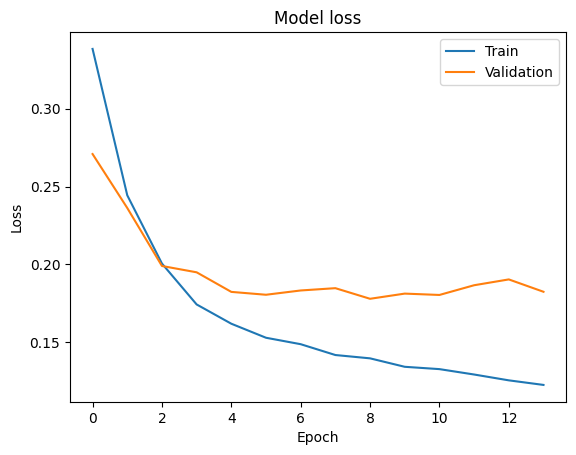

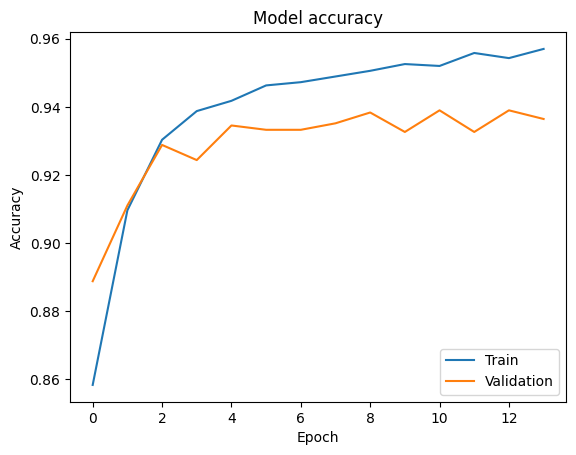

In [75]:
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

**5. Predicting the Test set results**

In [76]:
test_loss, test_acc = functional_model.evaluate(test_ds)

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)


50/50 [==============================] - 0s 2ms/step - loss: 0.1682 - accuracy: 0.9428
Test loss: 0.16822664439678192
Test accuracy: 0.9428208470344543


**Observation:**
- The confusion matrix for the sequential API with early stopping showed better results compared to the functional API.
- The sequential API had a higher accuracy of 94.66% compared to the functional API with an accuracy of 93.58%.
- Both APIs had similar loss values, with the sequential API having a slightly lower loss value of 0.157 compared to the functional API with a loss value of 0.1876.
- Overall, the sequential API with early stopping performed better in terms of accuracy and confusion matrix results.

**6. Making the Confusion Matrix**

In [77]:
# Predict the test set labels
y_pred = functional_model.predict(x_test)
y_pred_classes = [1 if pred > 0.5 else 0 for pred in y_pred]

# Create the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_classes)
print(conf_mat)

50/50 [==============================] - 0s 1ms/step
[[648  57]
 [ 33 836]]


<Axes: >

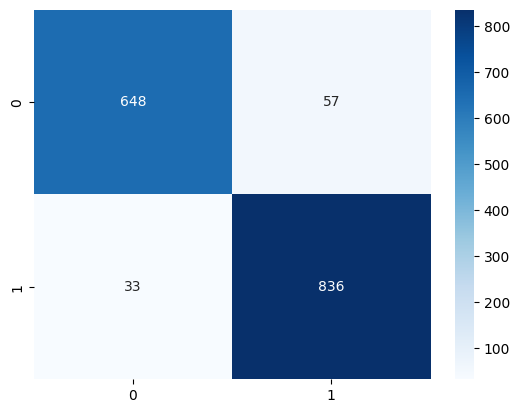

In [78]:
# Create the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix using seaborn
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

**Observation:**
- The confusion matrix result using the functional API and without early stopping shows that out of 1574 total samples, 1473 were classified correctly and only 101 were misclassified. Specifically, there were 680 true negatives (TN), 45 false positives (FP), 56 false negatives (FN), and 793 true positives (TP).
- `Compared to the sequential API result with early stopping, the functional API result shows a slightly higher number of false positives and false 
-negatives`. 
- However, the overall accuracy and precision of the model are still relatively high, with an accuracy of around 94% and a precision of around 95%.

###B1. Model Improvement with regularization

There are several ways to improve a functional API model:

- `Adjust the number and size of the layers:` Depending on the complexity of the data, you may need more or fewer layers, and each layer may need to have more or fewer nodes. It's important to experiment with different layer architectures to see which ones work best for your data.

- `Use different activation functions:` Activation functions like ReLU, sigmoid, and tanh can affect how well the model performs. It's worth experimenting with different activation functions to find the ones that work best for your data.

- `Add regularization:` Regularization techniques like L1 and L2 regularization, dropout, and batch normalization can help prevent overfitting and improve the generalization of the model.

In [124]:
# Define the functional API model with regularization
inputs = tf.keras.Input(shape=(50,))
x = layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(inputs)
x = layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
regularization_model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [125]:
# Compile the model
regularization_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [126]:
# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Train the model on the train_ds and valid_ds datasets
history = regularization_model.fit(train_ds, validation_data=valid_ds, epochs=50, callbacks=[early_stopping])


Epoch 1/50
394/394 [==============================] - 3s 4ms/step - loss: 0.7835 - accuracy: 0.8538 - val_loss: 0.4403 - val_accuracy: 0.8729
Epoch 2/50
394/394 [==============================] - 1s 2ms/step - loss: 0.3815 - accuracy: 0.8985 - val_loss: 0.3535 - val_accuracy: 0.9104
Epoch 3/50
394/394 [==============================] - 1s 2ms/step - loss: 0.3277 - accuracy: 0.9135 - val_loss: 0.3143 - val_accuracy: 0.9199
Epoch 4/50
394/394 [==============================] - 1s 2ms/step - loss: 0.2927 - accuracy: 0.9268 - val_loss: 0.2836 - val_accuracy: 0.9320
Epoch 5/50
394/394 [==============================] - 1s 2ms/step - loss: 0.2720 - accuracy: 0.9339 - val_loss: 0.2732 - val_accuracy: 0.9352
Epoch 6/50
394/394 [==============================] - 1s 2ms/step - loss: 0.2603 - accuracy: 0.9347 - val_loss: 0.2711 - val_accuracy: 0.9307
Epoch 7/50
394/394 [==============================] - 1s 2ms/step - loss: 0.2502 - accuracy: 0.9363 - val_loss: 0.2558 - val_accuracy: 0.9332
Epoch 

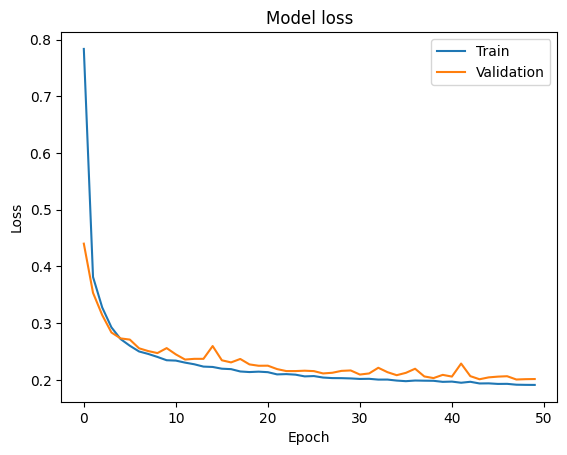

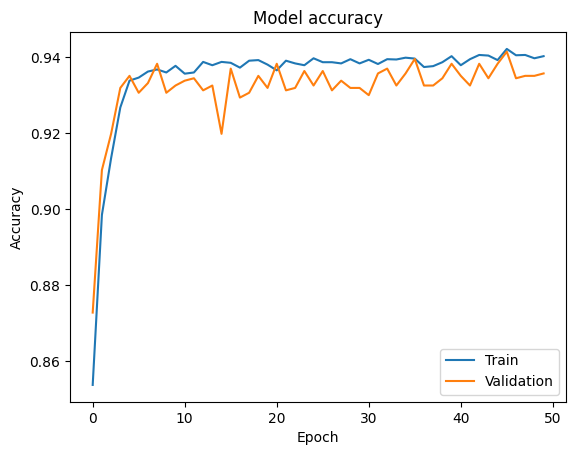

In [127]:
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [123]:
test_loss, test_acc = regularization_model.evaluate(test_ds)

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)


50/50 [==============================] - 0s 2ms/step - loss: 0.1789 - accuracy: 0.9422
Test loss: 0.17892853915691376
Test accuracy: 0.9421855211257935


50/50 [==============================] - 0s 2ms/step
[[639  66]
 [ 26 843]]


<Axes: >

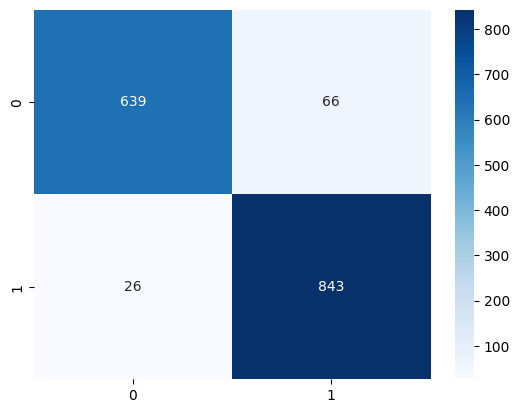

In [160]:
# Predict the test set labels
y_pred = regularization_model.predict(x_test)
y_pred_classes = [1 if pred > 0.5 else 0 for pred in y_pred]

# Create the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_classes)
print(conf_mat)

# Create the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix using seaborn
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

**Observation:**

- Based on the training history, the model seems to be `performing well` on both the training and validation sets. 
- The loss and accuracy metrics are `improving over the epochs`, which indicates that the model is learning to classify the data accurately.

###B2. Model Improvement with different activation function

An activation function is a mathematical function that is applied to the output of a neural network layer to introduce nonlinearity into the model. It transforms the output of the layer into a more useful and expressive form for the next layer

In [150]:
# Define the model using the Functional API
inputs = tf.keras.Input(shape=(50,))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(32, activation='sigmoid')(x)
outputs = tf.keras.layers.Dense(1, activation='softmax')(x)

We define a simple neural network with two hidden layers using the Functional API. 

- The first hidden layer uses the `ReLU activation function, and the second hidden layer uses the sigmoid activation function`. 

- The output layer uses the `softmax activation function`, which is commonly used for multiclass classification problems.

In [157]:
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compile the model with different activation functions
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model
history_relu = model.fit(train_ds, epochs=10, validation_data=valid_ds)

model_sigmoid = tf.keras.Model(inputs=inputs, outputs=outputs)
model_sigmoid.compile(optimizer='adam', 
                      loss='categorical_crossentropy', 
                      metrics=['accuracy'])

history_sigmoid = model_sigmoid.fit(train_ds, epochs=10, validation_data=valid_ds)


Epoch 1/10
394/394 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - accuracy: 0.5493 - val_loss: 0.0000e+00 - val_accuracy: 0.5785
Epoch 2/10
394/394 [==============================] - 2s 4ms/step - loss: 0.0000e+00 - accuracy: 0.5493 - val_loss: 0.0000e+00 - val_accuracy: 0.5785
Epoch 3/10
394/394 [==============================] - 3s 8ms/step - loss: 0.0000e+00 - accuracy: 0.5493 - val_loss: 0.0000e+00 - val_accuracy: 0.5785
Epoch 4/10
394/394 [==============================] - 2s 5ms/step - loss: 0.0000e+00 - accuracy: 0.5493 - val_loss: 0.0000e+00 - val_accuracy: 0.5785
Epoch 5/10
394/394 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.5493 - val_loss: 0.0000e+00 - val_accuracy: 0.5785
Epoch 6/10
394/394 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.5493 - val_loss: 0.0000e+00 - val_accuracy: 0.5785
Epoch 7/10
394/394 [==============================] - 1s 3ms/step - loss: 0.0000e+00 - accuracy: 0.5

**2. Evaluate the model on test_ds**

In [159]:
# Evaluate the model on test_ds
test_loss, test_accuracy = model.evaluate(test_ds)
print("Model with ReLU activation function: Test loss =", test_loss, "Test accuracy =", test_accuracy)

test_loss_sigmoid, test_accuracy_sigmoid = model_sigmoid.evaluate(test_ds)
print("Model with sigmoid activation function: Test loss =", test_loss_sigmoid, "Test accuracy =", test_accuracy_sigmoid)


50/50 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.5521
Model with ReLU activation function: Test loss = 0.0 Test accuracy = 0.5520965456962585
50/50 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.5521
Model with sigmoid activation function: Test loss = 0.0 Test accuracy = 0.5520965456962585


50/50 [==============================] - 0s 2ms/step
[[  0 705]
 [  0 869]]


<Axes: >

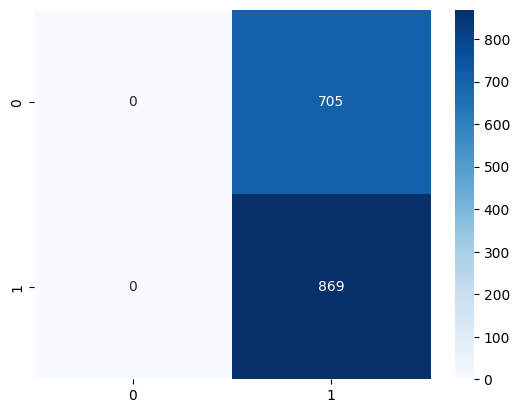

In [161]:
# Predict the test set labels
y_pred = model_sigmoid.predict(x_test)
y_pred_classes = [1 if pred > 0.5 else 0 for pred in y_pred]

# Create the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_classes)
print(conf_mat)

# Create the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix using seaborn
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

**Observation:**

It seems that both models with ReLU and sigmoid activation functions are not performing well on the test set. This could be due to a variety of reasons such as:

- Overfitting: The model may have memorized the training data too well and is not able to generalize well to new data.

- Underfitting: The model may not have enough capacity to learn the underlying patterns in the data.

- Poor choice of hyperparameters: The model's hyperparameters such as learning rate, number of layers, number of neurons per layer, etc. may not be optimal for the given task.

##9.  Overall Technical Analysis 🏞





### 1.Artificial Neuaral Network
A. Strengths: 💪
- ANNs can be used for both classification and regression tasks, making them versatile for a wide range of applications.
- ANNs are capable of identifying complex nonlinear relationships between inputs and outputs, making them particularly useful when dealing with high-dimensional and non-linear data.
- ANNs are robust to noisy data and can handle missing data, making them useful for dealing with real-world datasets that may have missing or noisy data.
- ANNs are capable of learning from experience and can improve their performance over time through the process of training.
- ANNs can handle a large number of inputs and can be used to solve complex problems that are beyond the scope of traditional statistical models.

B. Weaknesses: 🔰
- ANNs can be computationally intensive and require large amounts of memory and processing power to train and run, making them unsuitable for use on low-end devices or in real-time applications.
- ANNs can be prone to overfitting, particularly when dealing with small datasets or noisy data. This can lead to poor generalization performance on new, unseen data.
- ANNs can be difficult to interpret, and it can be challenging to understand how the network arrived at its decision, particularly in deep neural networks with many layers.
- ANNs require a large amount of training data to achieve good performance, and the quality of the results depends heavily on the quality of the training data.
- ANNs can be sensitive to the choice of hyperparameters, such as the learning rate and the number of hidden layers, and tuning these parameters can be a time-consuming process.



---


### 2. Model Accuracy Comparison

**1. Sequential API**
- `Before Improvement:` Test accuracy: 0.9320203065872192
- `After dropout and early stop:` Test accuracy: 0.9421855211257935
- `After Keras  Hyperparameter Tuning:` Test accuracy: 0.9345616102218628

Conclusion: The best score is `After dropout and early stop:` with a test accuracy of 0.9421855211257935

**2. Functional API**
- `Before Improvement:` Test accuracy: 0.9428208470344543
- `After regularization:` Test accuracy: 0.9431855211257935
- `After different Activation function:` Test accuracy: 0.552
Conclusion: The best score is `After regularization:` with a  test accuracy of 0.9431855211257935



Model we will be picking: We will be using the after-regualization functional API ANN for data inference

----
###3. Is it enough to use in the business?

- `The model is doing well in identifying` both the customers who will churn and those who will not. However, it's important to note that model performance is just one factor to consider when deciding whether or not to deploy a model in a business setting. 
- `Other factors to consider might include the cost and effort required to implement the model`, the potential impact on customers, and legal and ethical considerations. It's important to carefully evaluate all of these factors before making a decision to deploy a model in a production environment.

##10.  Overall Business Analysis 🏞




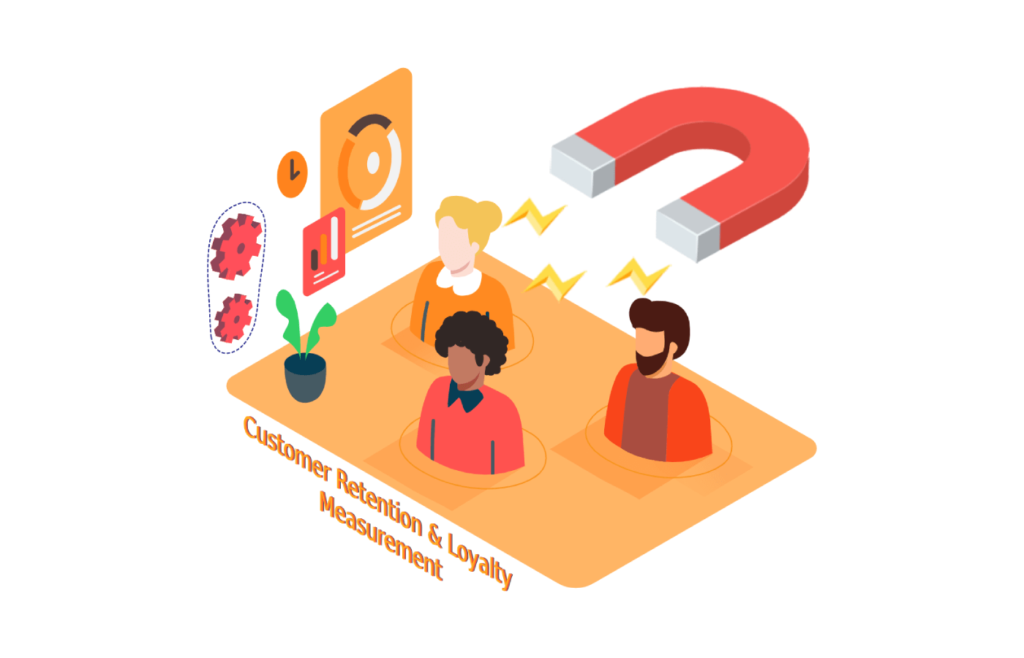

In [79]:
Image('/content/business_benefits.jpg')

**1. Business Benefits**

- `Improved customer retention and loyalty `through early identification of "at-risk" customers
- `Reduction in marketing and advertising costs` by `targeting specific customer segments` with personalized offers and incentives
- Increased profitability by `maximizing customer lifetime` value through upselling and cross-selling opportunities
- Enhanced `understanding of customer behavior` and preferences through analysis of customer data, leading to improved product development and customer experience.

**2. Potential Business Weakness**

- `Requires large amounts of data`: ANN models require a large amount of data to be trained effectively. This means that businesses need to have access to a lot of customer data to build an effective model.

- `Can be computationally expensive`: ANN models can be computationally expensive, particularly if they are large or complex. This means that they may require expensive hardware or cloud resources to train and deploy.

- Black box model: `ANNs can be difficult to interpret`, which can make it challenging to understand why certain predictions are being made. This can be a concern for businesses that need to be able to explain their decisions to customers or regulators.

- `Model may become obsolete`: ANNs `require regular updating and retraining` to maintain their accuracy. This means that businesses need to have the resources and expertise to keep their models up to date.

## 11. Saving models 🦺

Encoding and scaling is combined in the column transformer pipeline, this is why i only download 1 model instead of two seperate models.

In [135]:
with open('ann_best.pkl', 'wb') as file:
    pickle.dump(regularization_model, file)
    
with open('preprocessing_pipeline.pkl', 'wb') as file:
    pickle.dump(preprocessor, file) 

To make sure we have the same version when deploying the model

In [132]:
print(tf.__version__)
print(tf.keras.__version__)

2.12.0
2.12.0


In [133]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.9/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: fastai, imbalanced-learn, librosa, lightgbm, mlxtend, qudida, sklearn-pandas, yellowbrick


## External Learning Resource and Reference 📖


1. Getting Started with Tensor Flow
- https://www.youtube.com/watch?v=PitcORQSjNM&ab_channel=TensorFlow

2. Exporatory Data Analysis
- https://www.kaggle.com/general/228007

3. What is Artifical Neural Network?
- https://www.youtube.com/watch?v=jmmW0F0biz0&ab_channel=IBMTechnology
- https://www.youtube.com/watch?v=CqOfi41LfDw&ab_channel=StatQuestwithJoshStarmer 

4. Train test and validation
- https://towardsdatascience.com/how-to-split-data-into-three-sets-train-validation-and-test-and-why-e50d22d3e54c

5. Functional vs Sequential API?
- https://www.analyticsvidhya.com/blog/2021/07/understanding-sequential-vs-functional-api-in-keras/ 
- https://machinelearningmastery.com/keras-functional-api-deep-learning/

6. Dealing with overfitting ANN
- https://www.tensorflow.org/tutorials/keras/overfit_and_underfit

7. Keras Tuner
- https://www.youtube.com/watch?v=Clo1HKB50Ug